In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Load the datasets
df_pessoas_final = pd.read_csv('../Data/df_pessoas_final.csv')

In [3]:
df_pessoas_final.head()

,id_familia,id_pessoa,cod_sexo_pessoa,idade,cod_parentesco_rf_pessoa,cod_raca_cor_pessoa,cod_local_nascimento_pessoa,cod_certidao_registrada_pessoa,cod_deficiencia_memb,cod_sabe_ler_escrever_memb,...,cod_ano_serie_frequentou_memb,cod_concluiu_frequentou_memb,cod_trabalhou_memb,cod_afastado_trab_memb,cod_agricultura_trab_memb,cod_principal_trab_memb,cod_trabalho_12_meses_memb,qtd_meses_12_meses_memb,peso.pes,classe_renda
0,268503,2351897,2,4,3,1.0,2.0,1,2,2.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,563277716385694,0.0
1,268503,2578989,2,15,3,1.0,1.0,1,2,1.0,...,-1.0,-1.0,2.0,2.0,-1.0,-1.0,2.0,-1.0,563277716385694,0.0
2,268503,3312847,2,13,3,1.0,1.0,1,2,2.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,563277716385694,0.0
3,268503,10482075,2,38,1,1.0,2.0,1,2,1.0,...,4.0,1.0,1.0,-1.0,1.0,6.0,1.0,12.0,563277716385694,0.0
4,2888440,5553031,2,5,3,4.0,2.0,1,2,2.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,563263195326236,0.0


In [4]:
df_pessoas_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254997 entries, 0 to 254996
Data columns (total 25 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   id_familia                        254997 non-null  int64  
 1   id_pessoa                         254997 non-null  int64  
 2   cod_sexo_pessoa                   254997 non-null  int64  
 3   idade                             254997 non-null  int64  
 4   cod_parentesco_rf_pessoa          254997 non-null  int64  
 5   cod_raca_cor_pessoa               254997 non-null  float64
 6   cod_local_nascimento_pessoa       254997 non-null  float64
 7   cod_certidao_registrada_pessoa    254997 non-null  int64  
 8   cod_deficiencia_memb              254997 non-null  int64  
 9   cod_sabe_ler_escrever_memb        254997 non-null  float64
 10  ind_frequenta_escola_memb         254997 non-null  float64
 11  cod_escola_local_memb             254997 non-null  f

In [5]:
# Tentar converter todas as colunas de float64 para int64
for col in df_pessoas_final.select_dtypes(include=['float64']).columns:
    df_pessoas_final[col] = df_pessoas_final[col].apply(lambda x: int(x) if x != -1 else -1)

In [6]:
df_pessoas_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254997 entries, 0 to 254996
Data columns (total 25 columns):
 #   Column                            Non-Null Count   Dtype
---  ------                            --------------   -----
 0   id_familia                        254997 non-null  int64
 1   id_pessoa                         254997 non-null  int64
 2   cod_sexo_pessoa                   254997 non-null  int64
 3   idade                             254997 non-null  int64
 4   cod_parentesco_rf_pessoa          254997 non-null  int64
 5   cod_raca_cor_pessoa               254997 non-null  int64
 6   cod_local_nascimento_pessoa       254997 non-null  int64
 7   cod_certidao_registrada_pessoa    254997 non-null  int64
 8   cod_deficiencia_memb              254997 non-null  int64
 9   cod_sabe_ler_escrever_memb        254997 non-null  int64
 10  ind_frequenta_escola_memb         254997 non-null  int64
 11  cod_escola_local_memb             254997 non-null  int64
 12  cod_curso_freque

In [7]:
#Checando os valores únicos das colunas
# Definindo as colunas a serem analisadas
columns_to_check = ['cod_sexo_pessoa', 'idade',
       'cod_parentesco_rf_pessoa', 'cod_raca_cor_pessoa',
       'cod_local_nascimento_pessoa', 'cod_certidao_registrada_pessoa',
       'cod_deficiencia_memb', 'cod_sabe_ler_escrever_memb',
       'ind_frequenta_escola_memb', 'cod_escola_local_memb',
       'cod_curso_frequenta_memb', 'cod_ano_serie_frequenta_memb',
       'cod_curso_frequentou_pessoa_memb', 'cod_ano_serie_frequentou_memb',
       'cod_concluiu_frequentou_memb', 'cod_trabalhou_memb',
       'cod_afastado_trab_memb', 'cod_agricultura_trab_memb',
       'cod_principal_trab_memb', 'cod_trabalho_12_meses_memb',
       'qtd_meses_12_meses_memb', 'classe_renda'
]

# Criando um dicionário para armazenar os tipos de resposta
response_types = {}

# Iterando sobre as colunas e coletando os valores únicos
for column in columns_to_check:
    response_types[column] = df_pessoas_final[column].unique()

# Exibindo os tipos de resposta de cada coluna
for column, unique_values in response_types.items():
    print(f"Coluna: {column}\nValores únicos: {unique_values}\n")

Coluna: cod_sexo_pessoa
Valores únicos: [2 1]

Coluna: idade
Valores únicos: [  4  15  13  38   5  27  48  46   2  34  56  79  78  74  18   6  33  26
   3   7   9   1  22  11  19   8  17  36  12  31  21  65  72  23  32  14
  42  16  40  10  20  28  35  37  53   0  41  47  43  55  29  39  51  66
  24  75  67  62  64  45  25  44  54  63  52  71  77  95  80  69  58  49
  30  76  50  82  68  57  70  61  60  59  83  96  92  73 100  85  81  86
  90  91  84  88  98  87 107  89  99  97  93  94 116 130 121 104 101 111
 102 108]

Coluna: cod_parentesco_rf_pessoa
Valores únicos: [ 3  1  2  8  5 10  6  9  4 11  7]

Coluna: cod_raca_cor_pessoa
Valores únicos: [1 4 2 3 5]

Coluna: cod_local_nascimento_pessoa
Valores únicos: [2 1 3]

Coluna: cod_certidao_registrada_pessoa
Valores únicos: [1 2 3]

Coluna: cod_deficiencia_memb
Valores únicos: [2 1]

Coluna: cod_sabe_ler_escrever_memb
Valores únicos: [2 1]

Coluna: ind_frequenta_escola_memb
Valores únicos: [1 3 4 2]

Coluna: cod_escola_local_memb
Valore

In [8]:
# Verificar a contagem de valores únicos na coluna 'cod_parentesco_rf_pessoa'
print(df_pessoas_final['cod_parentesco_rf_pessoa'].value_counts())

cod_parentesco_rf_pessoa
3     113242
1      96502
2      31339
5       6080
6       2355
8       2149
10      2092
4        595
11       351
9        197
7         95
Name: count, dtype: int64


In [9]:
# Filtrar o dataframe por Responsável Familiar
df_pessoas_final_rf = df_pessoas_final[df_pessoas_final['cod_parentesco_rf_pessoa'] == 1]

# Visualizar as primeiras linhas do dataframe filtrado
df_pessoas_final_rf.head()


,id_familia,id_pessoa,cod_sexo_pessoa,idade,cod_parentesco_rf_pessoa,cod_raca_cor_pessoa,cod_local_nascimento_pessoa,cod_certidao_registrada_pessoa,cod_deficiencia_memb,cod_sabe_ler_escrever_memb,...,cod_ano_serie_frequentou_memb,cod_concluiu_frequentou_memb,cod_trabalhou_memb,cod_afastado_trab_memb,cod_agricultura_trab_memb,cod_principal_trab_memb,cod_trabalho_12_meses_memb,qtd_meses_12_meses_memb,peso.pes,classe_renda
3,268503,10482075,2,38,1,1,2,1,2,1,...,4,1,1,-1,1,6,1,12,563277716385694,0
5,2888440,8540843,2,27,1,4,1,1,2,1,...,1,2,2,2,-1,-1,2,-1,563263195326236,0
7,2113517,2667228,2,46,1,4,1,1,2,1,...,4,1,1,-1,2,6,1,12,563229587638739,2
9,4419096,4471735,2,34,1,1,1,1,2,1,...,3,1,2,2,-1,-1,2,-1,563276393161791,0
10,4241219,7097369,2,56,1,4,2,1,2,1,...,6,2,2,2,-1,-1,2,-1,56328235405831,0


In [10]:
df_pessoas_final_rf.head()

,id_familia,id_pessoa,cod_sexo_pessoa,idade,cod_parentesco_rf_pessoa,cod_raca_cor_pessoa,cod_local_nascimento_pessoa,cod_certidao_registrada_pessoa,cod_deficiencia_memb,cod_sabe_ler_escrever_memb,...,cod_ano_serie_frequentou_memb,cod_concluiu_frequentou_memb,cod_trabalhou_memb,cod_afastado_trab_memb,cod_agricultura_trab_memb,cod_principal_trab_memb,cod_trabalho_12_meses_memb,qtd_meses_12_meses_memb,peso.pes,classe_renda
3,268503,10482075,2,38,1,1,2,1,2,1,...,4,1,1,-1,1,6,1,12,563277716385694,0
5,2888440,8540843,2,27,1,4,1,1,2,1,...,1,2,2,2,-1,-1,2,-1,563263195326236,0
7,2113517,2667228,2,46,1,4,1,1,2,1,...,4,1,1,-1,2,6,1,12,563229587638739,2
9,4419096,4471735,2,34,1,1,1,1,2,1,...,3,1,2,2,-1,-1,2,-1,563276393161791,0
10,4241219,7097369,2,56,1,4,2,1,2,1,...,6,2,2,2,-1,-1,2,-1,56328235405831,0


In [11]:
df_pessoas_final_rf.columns

Index(['id_familia', 'id_pessoa', 'cod_sexo_pessoa', 'idade',
       'cod_parentesco_rf_pessoa', 'cod_raca_cor_pessoa',
       'cod_local_nascimento_pessoa', 'cod_certidao_registrada_pessoa',
       'cod_deficiencia_memb', 'cod_sabe_ler_escrever_memb',
       'ind_frequenta_escola_memb', 'cod_escola_local_memb',
       'cod_curso_frequenta_memb', 'cod_ano_serie_frequenta_memb',
       'cod_curso_frequentou_pessoa_memb', 'cod_ano_serie_frequentou_memb',
       'cod_concluiu_frequentou_memb', 'cod_trabalhou_memb',
       'cod_afastado_trab_memb', 'cod_agricultura_trab_memb',
       'cod_principal_trab_memb', 'cod_trabalho_12_meses_memb',
       'qtd_meses_12_meses_memb', 'peso.pes', 'classe_renda'],
      dtype='object')

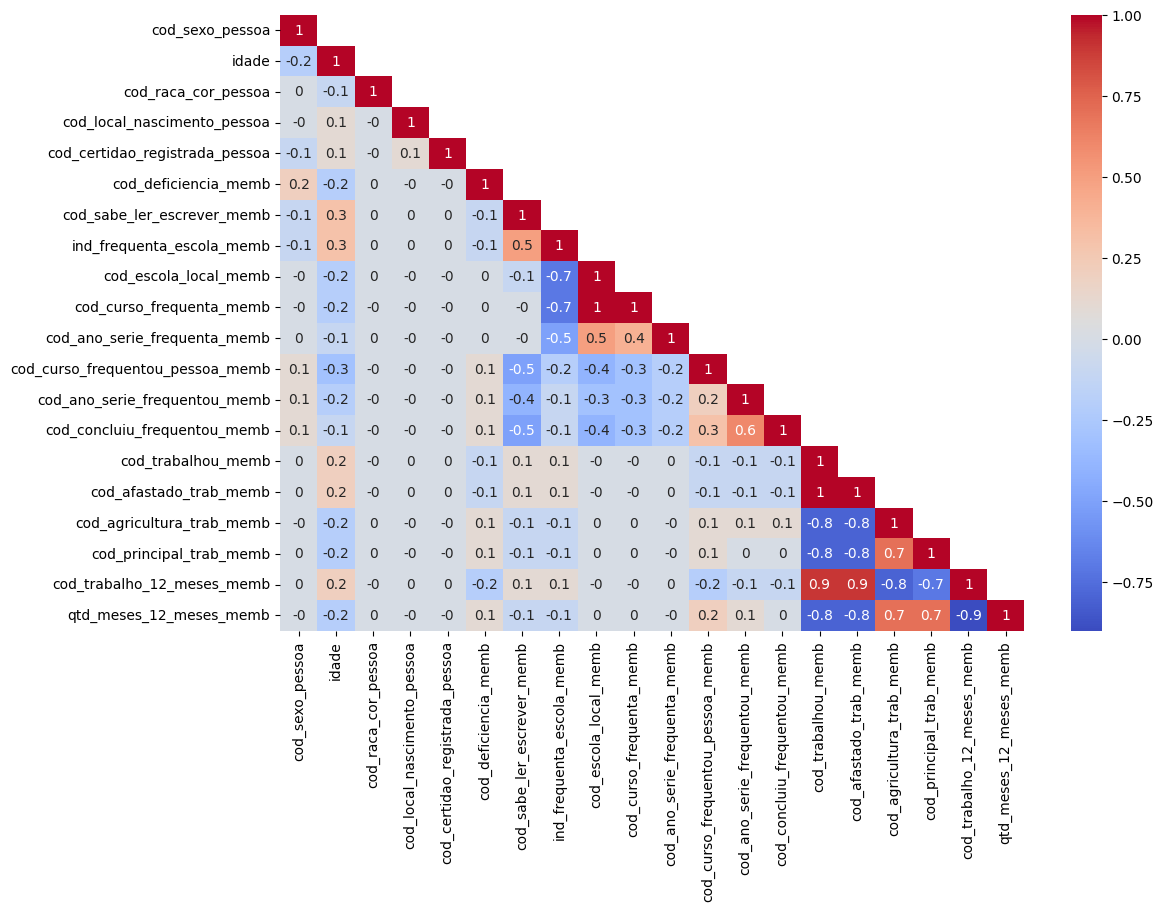

In [12]:
# Cria mask para não mostrar valores acima da diagonal
df_features = df_pessoas_final_rf[['cod_sexo_pessoa', 'idade',
       'cod_raca_cor_pessoa',
       'cod_local_nascimento_pessoa', 'cod_certidao_registrada_pessoa',
       'cod_deficiencia_memb', 'cod_sabe_ler_escrever_memb',
       'ind_frequenta_escola_memb', 'cod_escola_local_memb',
       'cod_curso_frequenta_memb', 'cod_ano_serie_frequenta_memb',
       'cod_curso_frequentou_pessoa_memb', 'cod_ano_serie_frequentou_memb',
       'cod_concluiu_frequentou_memb', 'cod_trabalhou_memb',
       'cod_afastado_trab_memb', 'cod_agricultura_trab_memb',
       'cod_principal_trab_memb', 'cod_trabalho_12_meses_memb',
       'qtd_meses_12_meses_memb']]

mask = np.triu(np.ones_like(df_features.corr(), dtype=bool), k=1)

plt.figure(figsize=(12,8))
sns.heatmap(df_features.corr().round(1), annot=True, cmap='coolwarm', mask=mask)
plt.show()

In [13]:
#Retirando features com correlação > 8
df_pessoas_final_rf = df_pessoas_final_rf.drop(columns=['cod_afastado_trab_memb', 'qtd_meses_12_meses_memb'])
                                               
df_pessoas_final_rf.head()

,id_familia,id_pessoa,cod_sexo_pessoa,idade,cod_parentesco_rf_pessoa,cod_raca_cor_pessoa,cod_local_nascimento_pessoa,cod_certidao_registrada_pessoa,cod_deficiencia_memb,cod_sabe_ler_escrever_memb,...,cod_ano_serie_frequenta_memb,cod_curso_frequentou_pessoa_memb,cod_ano_serie_frequentou_memb,cod_concluiu_frequentou_memb,cod_trabalhou_memb,cod_agricultura_trab_memb,cod_principal_trab_memb,cod_trabalho_12_meses_memb,peso.pes,classe_renda
3,268503,10482075,2,38,1,1,2,1,2,1,...,-1,4,4,1,1,1,6,1,563277716385694,0
5,2888440,8540843,2,27,1,4,1,1,2,1,...,-1,8,1,2,2,-1,-1,2,563263195326236,0
7,2113517,2667228,2,46,1,4,1,1,2,1,...,-1,4,4,1,1,2,6,1,563229587638739,2
9,4419096,4471735,2,34,1,1,1,1,2,1,...,-1,8,3,1,2,-1,-1,2,563276393161791,0
10,4241219,7097369,2,56,1,4,2,1,2,1,...,-1,5,6,2,2,-1,-1,2,56328235405831,0


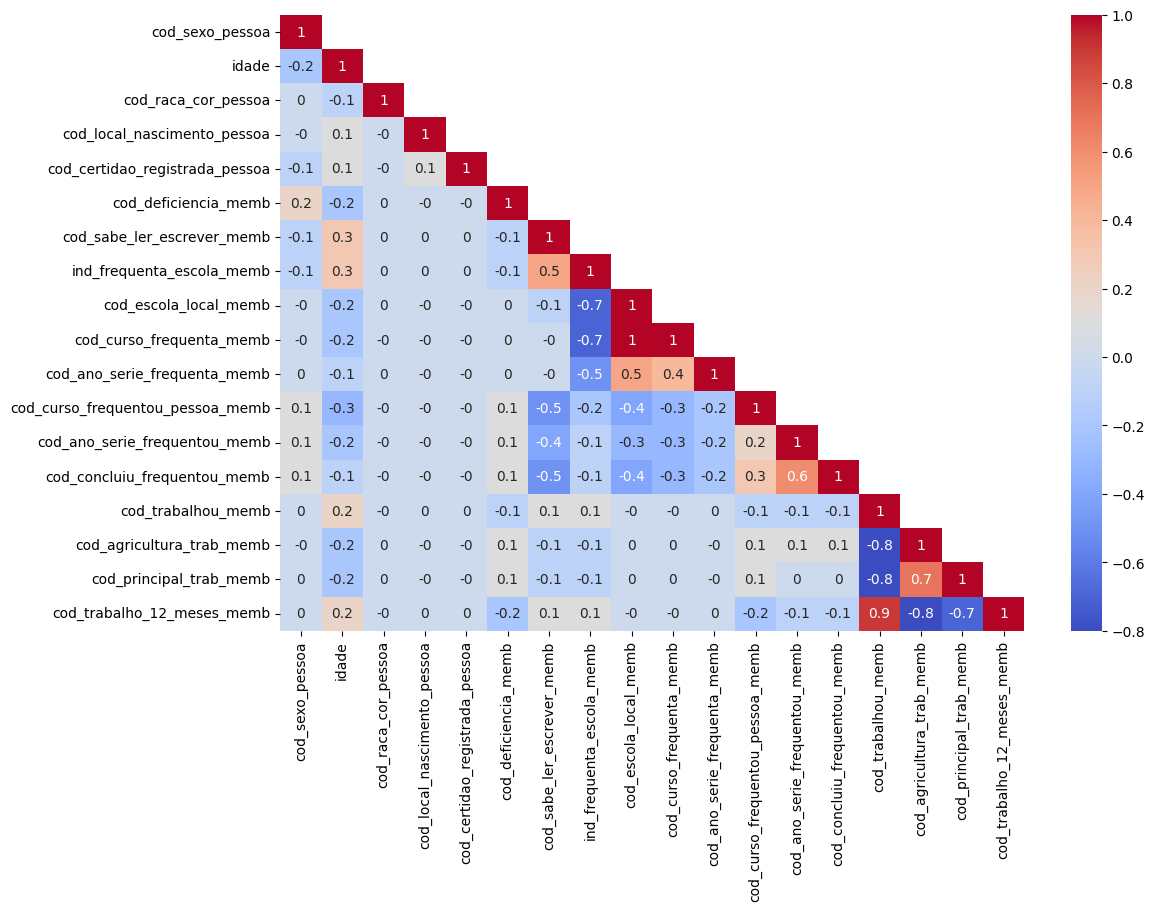

In [14]:
# Cria mask para não mostrar valores acima da diagonal
df_features = df_pessoas_final_rf[['cod_sexo_pessoa', 'idade',
      'cod_raca_cor_pessoa', 'cod_local_nascimento_pessoa', 'cod_certidao_registrada_pessoa',
       'cod_deficiencia_memb', 'cod_sabe_ler_escrever_memb',
       'ind_frequenta_escola_memb', 'cod_escola_local_memb',
       'cod_curso_frequenta_memb', 'cod_ano_serie_frequenta_memb',
       'cod_curso_frequentou_pessoa_memb', 'cod_ano_serie_frequentou_memb',
       'cod_concluiu_frequentou_memb', 'cod_trabalhou_memb',
       'cod_agricultura_trab_memb',
       'cod_principal_trab_memb', 'cod_trabalho_12_meses_memb']]

mask = np.triu(np.ones_like(df_features.corr(), dtype=bool), k=1)

plt.figure(figsize=(12,8))
sns.heatmap(df_features.corr().round(1), annot=True, cmap='coolwarm', mask=mask)
plt.show()

In [15]:
#Retirando features com correlação > 8
df_pessoas_final_rf = df_pessoas_final_rf.drop(columns=['cod_trabalho_12_meses_memb'])
                                               
df_pessoas_final_rf.head()

,id_familia,id_pessoa,cod_sexo_pessoa,idade,cod_parentesco_rf_pessoa,cod_raca_cor_pessoa,cod_local_nascimento_pessoa,cod_certidao_registrada_pessoa,cod_deficiencia_memb,cod_sabe_ler_escrever_memb,...,cod_curso_frequenta_memb,cod_ano_serie_frequenta_memb,cod_curso_frequentou_pessoa_memb,cod_ano_serie_frequentou_memb,cod_concluiu_frequentou_memb,cod_trabalhou_memb,cod_agricultura_trab_memb,cod_principal_trab_memb,peso.pes,classe_renda
3,268503,10482075,2,38,1,1,2,1,2,1,...,-1,-1,4,4,1,1,1,6,563277716385694,0
5,2888440,8540843,2,27,1,4,1,1,2,1,...,-1,-1,8,1,2,2,-1,-1,563263195326236,0
7,2113517,2667228,2,46,1,4,1,1,2,1,...,-1,-1,4,4,1,1,2,6,563229587638739,2
9,4419096,4471735,2,34,1,1,1,1,2,1,...,-1,-1,8,3,1,2,-1,-1,563276393161791,0
10,4241219,7097369,2,56,1,4,2,1,2,1,...,-1,-1,5,6,2,2,-1,-1,56328235405831,0


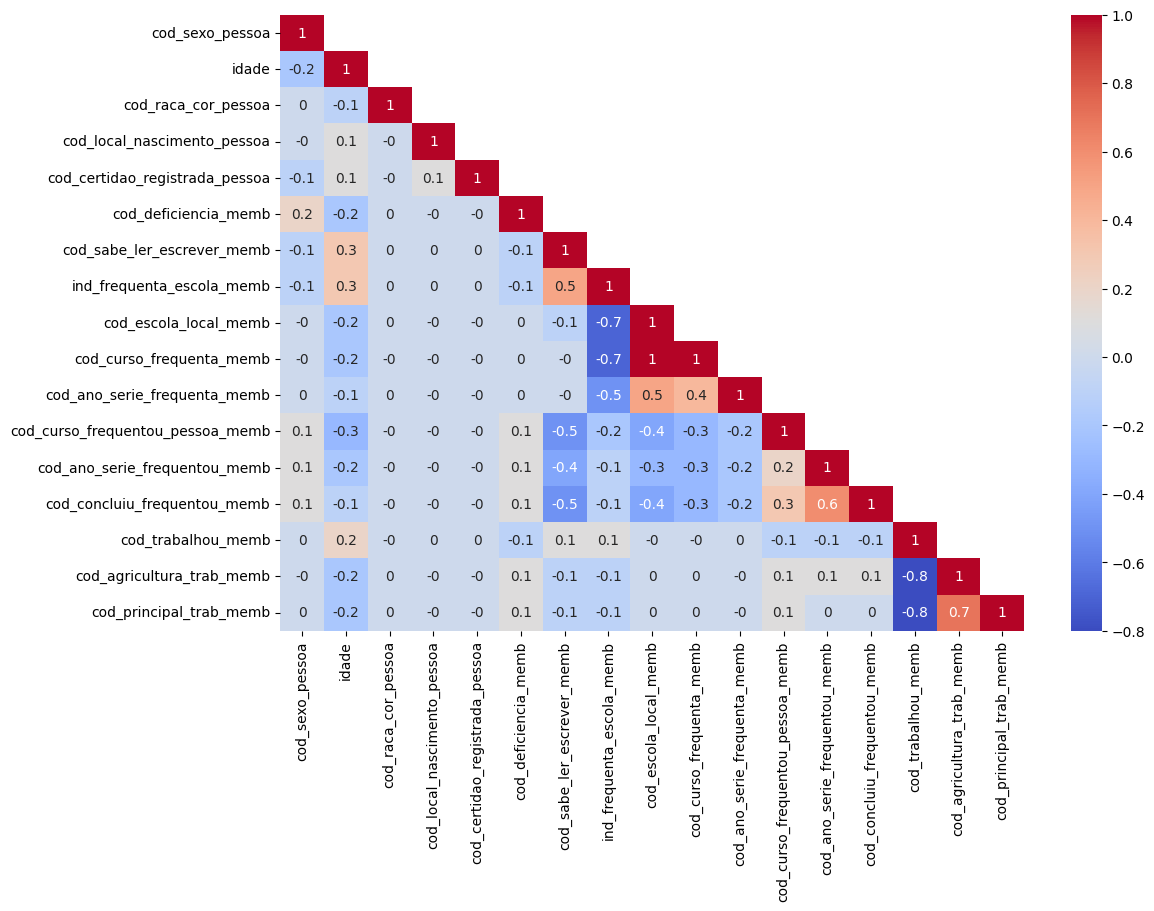

In [16]:
# Cria mask para não mostrar valores acima da diagonal
df_features = df_pessoas_final_rf[['cod_sexo_pessoa', 'idade',
      'cod_raca_cor_pessoa', 'cod_local_nascimento_pessoa', 'cod_certidao_registrada_pessoa',
       'cod_deficiencia_memb', 'cod_sabe_ler_escrever_memb',
       'ind_frequenta_escola_memb', 'cod_escola_local_memb',
       'cod_curso_frequenta_memb', 'cod_ano_serie_frequenta_memb',
       'cod_curso_frequentou_pessoa_memb', 'cod_ano_serie_frequentou_memb',
       'cod_concluiu_frequentou_memb', 'cod_trabalhou_memb',
       'cod_agricultura_trab_memb',
       'cod_principal_trab_memb']]

mask = np.triu(np.ones_like(df_features.corr(), dtype=bool), k=1)

plt.figure(figsize=(12,8))
sns.heatmap(df_features.corr().round(1), annot=True, cmap='coolwarm', mask=mask)
plt.show()

In [17]:
df_pessoas_final_rf.columns

Index(['id_familia', 'id_pessoa', 'cod_sexo_pessoa', 'idade',
       'cod_parentesco_rf_pessoa', 'cod_raca_cor_pessoa',
       'cod_local_nascimento_pessoa', 'cod_certidao_registrada_pessoa',
       'cod_deficiencia_memb', 'cod_sabe_ler_escrever_memb',
       'ind_frequenta_escola_memb', 'cod_escola_local_memb',
       'cod_curso_frequenta_memb', 'cod_ano_serie_frequenta_memb',
       'cod_curso_frequentou_pessoa_memb', 'cod_ano_serie_frequentou_memb',
       'cod_concluiu_frequentou_memb', 'cod_trabalhou_memb',
       'cod_agricultura_trab_memb', 'cod_principal_trab_memb', 'peso.pes',
       'classe_renda'],
      dtype='object')

In [18]:
# Lista de variáveis categóricas numéricas a serem transformadas
categorical_columns = ['cod_sexo_pessoa','cod_raca_cor_pessoa',
       'cod_local_nascimento_pessoa', 'cod_certidao_registrada_pessoa',
       'cod_deficiencia_memb', 'cod_sabe_ler_escrever_memb',
       'ind_frequenta_escola_memb', 'cod_escola_local_memb',
       'cod_curso_frequenta_memb', 'cod_ano_serie_frequenta_memb',
       'cod_curso_frequentou_pessoa_memb', 'cod_ano_serie_frequentou_memb',
       'cod_concluiu_frequentou_memb', 'cod_trabalhou_memb',
       'cod_agricultura_trab_memb', 'cod_principal_trab_memb']

# Identificar variáveis binárias (com duas categorias)
binary_columns = [col for col in categorical_columns if df_pessoas_final_rf[col].nunique() == 2]
non_binary_columns = [col for col in categorical_columns if col not in binary_columns]

# Aplicar One-Hot Encoding nas variáveis binárias com drop_first=True
df_pessoas_final_rf = pd.get_dummies(df_pessoas_final_rf, columns=binary_columns, drop_first=True)

# Aplicar One-Hot Encoding nas variáveis não-binárias sem remover a primeira categoria
df_pessoas_final_rf = pd.get_dummies(df_pessoas_final_rf, columns=non_binary_columns, drop_first=False)


# Convertendo as colunas geradas para inteiros (0 e 1)
df_pessoas_final_rf = df_pessoas_final_rf.astype(int)

In [19]:
df_pessoas_final_rf.head()

,id_familia,id_pessoa,idade,cod_parentesco_rf_pessoa,peso.pes,classe_renda,cod_sexo_pessoa_2,cod_deficiencia_memb_2,cod_sabe_ler_escrever_memb_2,cod_trabalhou_memb_2,...,cod_principal_trab_memb_2,cod_principal_trab_memb_3,cod_principal_trab_memb_4,cod_principal_trab_memb_5,cod_principal_trab_memb_6,cod_principal_trab_memb_7,cod_principal_trab_memb_8,cod_principal_trab_memb_9,cod_principal_trab_memb_10,cod_principal_trab_memb_11
3,268503,10482075,38,1,1345449886,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
5,2888440,8540843,27,1,-290707684,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
7,2113517,2667228,46,1,461343187,2,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
9,4419096,4471735,34,1,22225983,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
10,4241219,7097369,56,1,-260681209,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df_pessoas_final_rf.columns

Index(['id_familia', 'id_pessoa', 'idade', 'cod_parentesco_rf_pessoa',
       'peso.pes', 'classe_renda', 'cod_sexo_pessoa_2',
       'cod_deficiencia_memb_2', 'cod_sabe_ler_escrever_memb_2',
       'cod_trabalhou_memb_2', 'cod_raca_cor_pessoa_1',
       'cod_raca_cor_pessoa_2', 'cod_raca_cor_pessoa_3',
       'cod_raca_cor_pessoa_4', 'cod_raca_cor_pessoa_5',
       'cod_local_nascimento_pessoa_1', 'cod_local_nascimento_pessoa_2',
       'cod_local_nascimento_pessoa_3', 'cod_certidao_registrada_pessoa_1',
       'cod_certidao_registrada_pessoa_2', 'cod_certidao_registrada_pessoa_3',
       'ind_frequenta_escola_memb_1', 'ind_frequenta_escola_memb_2',
       'ind_frequenta_escola_memb_3', 'ind_frequenta_escola_memb_4',
       'cod_escola_local_memb_-1', 'cod_escola_local_memb_1',
       'cod_escola_local_memb_2', 'cod_curso_frequenta_memb_-1',
       'cod_curso_frequenta_memb_1', 'cod_curso_frequenta_memb_3',
       'cod_curso_frequenta_memb_4', 'cod_curso_frequenta_memb_5',
       'cod

In [21]:
# Dicionário com os novos nomes das colunas
new_column_names = {
    'cod_sexo_pessoa_2': 'rf_feminino', 'cod_deficiencia_memb_2': 'rf_nao_deficiencia',
       'cod_sabe_ler_escrever_memb_2': 'rf_nao_le_escreve', 'cod_trabalhou_memb_2':'rf_nao_trabalhou',
       'cod_raca_cor_pessoa_1': 'rf_branca',
       'cod_raca_cor_pessoa_2': 'rf_ preta', 'cod_raca_cor_pessoa_3': 'rf_amarela',
       'cod_raca_cor_pessoa_4': 'rf_parda', 'cod_raca_cor_pessoa_5': 'rf_indigena',
       'cod_local_nascimento_pessoa_1': 'rf_neste_municipio', 'cod_local_nascimento_pessoa_2': 'rf_outro_municipio',
       'cod_local_nascimento_pessoa_3': 'rf_outro_pais', 'cod_certidao_registrada_pessoa_1': 'rf_certidao_sim_tem',
       'cod_certidao_registrada_pessoa_2': 'rf_certidao_sim_nao_tem', 'cod_certidao_registrada_pessoa_3': 'rf_certidao_nao',
       'ind_frequenta_escola_memb_1': 'rf_frequenta_escola_pub', 'ind_frequenta_escola_memb_2': 'rf_frequenta_escola_priv' ,
       'ind_frequenta_escola_memb_3': 'rf_frequentou_escola', 'ind_frequenta_escola_memb_4': 'rf_nunca_frequentou_escola',
       'cod_escola_local_memb_-1': 'rf_local_escola_nao_se_aplica', 'cod_escola_local_memb_1': 'rf_local_escola_municipio',
       'cod_escola_local_memb_2': 'rf_local_escola_outro_municipio', 'cod_curso_frequenta_memb_-1': 'rf_curso_frequenta_nao_se_aplica',
       'cod_curso_frequenta_memb_1': 'rf_curso_frequenta_creche', 'cod_curso_frequenta_memb_3': 'rf_curso_frequenta_alfabetizacao',
       'cod_curso_frequenta_memb_4': 'rf_curso_frequenta_fund_regular8', 'cod_curso_frequenta_memb_5': 'rf_curso_frequenta_fund_regular9',
       'cod_curso_frequenta_memb_6': 'rf_curso_frequenta_fund_especial', 'cod_curso_frequenta_memb_7': 'rf_curso_frequenta_medio_regular',
       'cod_curso_frequenta_memb_8': 'rf_curso_frequenta_medio_especial', 'cod_curso_frequenta_memb_9': 'rf_curso_frequenta_eja_iniciais',
       'cod_curso_frequenta_memb_10': 'rf_curso_frequenta_eja_finais', 'cod_curso_frequenta_memb_11': 'rf_curso_frequenta_eja_supletivo',
       'cod_curso_frequenta_memb_12': 'rf_curso_frequenta_alfabetizacao_adulto', 'cod_curso_frequenta_memb_13': 'rf_curso_frequenta_superior_mais',
       'cod_curso_frequenta_memb_14': 'rf_curso_frequenta_pre_vestibular', 'cod_ano_serie_frequenta_memb_-1': 'rf_frequenta_ano_nao_se_aplica',
       'cod_ano_serie_frequenta_memb_1': 'rf_frequenta_1_ano', 'cod_ano_serie_frequenta_memb_2': 'rf_frequenta_2_ano',
       'cod_ano_serie_frequenta_memb_3': 'rf_frequenta_3_ano', 'cod_ano_serie_frequenta_memb_4':'rf_frequenta_4_ano',
       'cod_ano_serie_frequenta_memb_5': 'rf_frequenta_5_ano', 'cod_ano_serie_frequenta_memb_6': 'rf_frequenta_6_ano',
       'cod_ano_serie_frequenta_memb_7': 'rf_frequenta_7_ano', 'cod_ano_serie_frequenta_memb_8': 'rf_frequenta_8_ano',
       'cod_ano_serie_frequenta_memb_9': 'rf_frequenta_9_ano', 'cod_ano_serie_frequenta_memb_10': 'rf_frequenta_nao_seriado',
       'cod_curso_frequentou_pessoa_memb_-1': 'rf_curso_frequentou_nao_se_aplica',
       'cod_curso_frequentou_pessoa_memb_1': 'rf_curso_frequentou_creche',
       'cod_curso_frequentou_pessoa_memb_2': 'rf_curso_frequentou_pre_escola',
       'cod_curso_frequentou_pessoa_memb_3': 'rf_curso_frequentou_alfabetizacao' ,
       'cod_curso_frequentou_pessoa_memb_4': 'rf_curso_frequentou_fund_inicial' ,
       'cod_curso_frequentou_pessoa_memb_5': 'rf_curso_frequentou_fund_final',
       'cod_curso_frequentou_pessoa_memb_6': 'rf_curso_frequentou_fund_9anos',
       'cod_curso_frequentou_pessoa_memb_7': 'rf_curso_frequentou_fund_especial',
       'cod_curso_frequentou_pessoa_memb_8': 'rf_curso_frequentou_medio',
       'cod_curso_frequentou_pessoa_memb_9': 'rf_curso_frequentou_medio_especial',
       'cod_curso_frequentou_pessoa_memb_10': 'rf_curso_frequentou_eja_inicias',
       'cod_curso_frequentou_pessoa_memb_11': 'rf_curso_frequentou_eja_finais',
       'cod_curso_frequentou_pessoa_memb_12': 'rf_curso_frequentou_eja_supletivo',
       'cod_curso_frequentou_pessoa_memb_13': 'rf_curso_frequentou_sup_mais',
       'cod_curso_frequentou_pessoa_memb_14': 'rf_curso_frequentou_alfaetizacao_adulto',
       'cod_curso_frequentou_pessoa_memb_15': 'rf_curso_frequentou_nenhum',
       'cod_ano_serie_frequentou_memb_-1': 'rf_frequentou_ano_nao_se_aplica', 'cod_ano_serie_frequentou_memb_1': 'rf_frequentou_1_ano',
       'cod_ano_serie_frequentou_memb_2': 'rf_frequentou_2_ano', 'cod_ano_serie_frequentou_memb_3': 'rf_frequentou_3_ano',
       'cod_ano_serie_frequentou_memb_4': 'rf_frequentou_4_ano', 'cod_ano_serie_frequentou_memb_5': 'rf_frequentou_5_ano',
       'cod_ano_serie_frequentou_memb_6': 'rf_frequentou_6_ano', 'cod_ano_serie_frequentou_memb_7': 'rf_frequentou_7_ano',
       'cod_ano_serie_frequentou_memb_8': 'rf_frequentou_8_ano', 'cod_ano_serie_frequentou_memb_9': 'rf_frequentou_9_ano',
       'cod_ano_serie_frequentou_memb_10': 'rf_frequentou_nao_seriado', 'cod_concluiu_frequentou_memb_-1': 'rf_concluiu_curso_nao_se_aplica',
       'cod_concluiu_frequentou_memb_1': 'rf_concluiu_curso', 'cod_concluiu_frequentou_memb_2': 'rf_nao_concluiu_curso',
       'cod_agricultura_trab_memb_-1': 'rf_atividade_extrativista_nao_aplica', 'cod_agricultura_trab_memb_1': 'rf_atividade_extrativista_sim',
       'cod_agricultura_trab_memb_2': 'rf_atividade_extrativista_nao', 'cod_agricultura_trab_memb_9': 'rf_atividade_extrativista_nao_se_sabe',
       'cod_principal_trab_memb_-1': 'rf_atividade_principal_nao_aplica', 'cod_principal_trab_memb_1': 'rf_atividade_principal_autonomo',
       'cod_principal_trab_memb_2': 'rf_atividade_principal_temporario_rural', 'cod_principal_trab_memb_3': 'rf_atividade_principal_empregado_carteira_ass',
       'cod_principal_trab_memb_4': 'rf_atividade_principal_empregado_sem_carteira_ass', 'cod_principal_trab_memb_5': 'rf_atividade_principal_domestico_carteira_ass',
       'cod_principal_trab_memb_6': 'rf_atividade_principal_domestico_sem_carteira_ass', 'cod_principal_trab_memb_7': 'rf_atividade_principal_nao_remunerado',
       'cod_principal_trab_memb_8': 'rf_atividade_principal_militar_servidor', 'cod_principal_trab_memb_9': 'rf_atividade_principal_empregador',
       'cod_principal_trab_memb_10': 'rf_atividade_principal_estagiario',  'cod_principal_trab_memb_11':'cod_principal_aprendiz'
}

# Renomeando as colunas no dataframe
df_pessoas_final_rf = df_pessoas_final_rf.rename(columns=new_column_names)

In [22]:
df_pessoas_final_rf.head()

,id_familia,id_pessoa,idade,cod_parentesco_rf_pessoa,peso.pes,classe_renda,rf_feminino,rf_nao_deficiencia,rf_nao_le_escreve,rf_nao_trabalhou,...,rf_atividade_principal_temporario_rural,rf_atividade_principal_empregado_carteira_ass,rf_atividade_principal_empregado_sem_carteira_ass,rf_atividade_principal_domestico_carteira_ass,rf_atividade_principal_domestico_sem_carteira_ass,rf_atividade_principal_nao_remunerado,rf_atividade_principal_militar_servidor,rf_atividade_principal_empregador,rf_atividade_principal_estagiario,cod_principal_aprendiz
3,268503,10482075,38,1,1345449886,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
5,2888440,8540843,27,1,-290707684,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
7,2113517,2667228,46,1,461343187,2,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
9,4419096,4471735,34,1,22225983,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
10,4241219,7097369,56,1,-260681209,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [23]:
from sklearn.preprocessing import MinMaxScaler

# Inicializa o MinMaxScaler
scaler = MinMaxScaler()

# Normaliza a coluna 'idade' e substitui os valores originais
df_pessoas_final_rf['idade'] = scaler.fit_transform(df_pessoas_final_rf[['idade']])


In [24]:
df_pessoas_final_rf.head()

,id_familia,id_pessoa,idade,cod_parentesco_rf_pessoa,peso.pes,classe_renda,rf_feminino,rf_nao_deficiencia,rf_nao_le_escreve,rf_nao_trabalhou,...,rf_atividade_principal_temporario_rural,rf_atividade_principal_empregado_carteira_ass,rf_atividade_principal_empregado_sem_carteira_ass,rf_atividade_principal_domestico_carteira_ass,rf_atividade_principal_domestico_sem_carteira_ass,rf_atividade_principal_nao_remunerado,rf_atividade_principal_militar_servidor,rf_atividade_principal_empregador,rf_atividade_principal_estagiario,cod_principal_aprendiz
3,268503,10482075,0.206897,1,1345449886,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
5,2888440,8540843,0.112069,1,-290707684,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
7,2113517,2667228,0.275862,1,461343187,2,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
9,4419096,4471735,0.172414,1,22225983,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
10,4241219,7097369,0.362069,1,-260681209,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


# Seleção das variáveis independentes (Features)

In [25]:
 df_pessoas_final_rf.columns

Index(['id_familia', 'id_pessoa', 'idade', 'cod_parentesco_rf_pessoa',
       'peso.pes', 'classe_renda', 'rf_feminino', 'rf_nao_deficiencia',
       'rf_nao_le_escreve', 'rf_nao_trabalhou', 'rf_branca', 'rf_ preta',
       'rf_amarela', 'rf_parda', 'rf_indigena', 'rf_neste_municipio',
       'rf_outro_municipio', 'rf_outro_pais', 'rf_certidao_sim_tem',
       'rf_certidao_sim_nao_tem', 'rf_certidao_nao', 'rf_frequenta_escola_pub',
       'rf_frequenta_escola_priv', 'rf_frequentou_escola',
       'rf_nunca_frequentou_escola', 'rf_local_escola_nao_se_aplica',
       'rf_local_escola_municipio', 'rf_local_escola_outro_municipio',
       'rf_curso_frequenta_nao_se_aplica', 'rf_curso_frequenta_creche',
       'rf_curso_frequenta_alfabetizacao', 'rf_curso_frequenta_fund_regular8',
       'rf_curso_frequenta_fund_regular9', 'rf_curso_frequenta_fund_especial',
       'rf_curso_frequenta_medio_regular', 'rf_curso_frequenta_medio_especial',
       'rf_curso_frequenta_eja_iniciais', 'rf_curso_fr

In [26]:
# Selecionando as variáveis que serão utilizadas para o modelo
X = df_pessoas_final_rf[['idade', 'rf_feminino', 'rf_nao_deficiencia',
       'rf_nao_le_escreve', 'rf_nao_trabalhou', 'rf_branca', 'rf_ preta',
       'rf_amarela', 'rf_parda', 'rf_indigena', 'rf_neste_municipio',
       'rf_outro_municipio', 'rf_outro_pais', 'rf_certidao_sim_tem',
       'rf_certidao_sim_nao_tem', 'rf_certidao_nao', 'rf_frequenta_escola_pub',
       'rf_frequenta_escola_priv', 'rf_frequentou_escola',
       'rf_nunca_frequentou_escola', 'rf_local_escola_nao_se_aplica',
       'rf_local_escola_municipio', 'rf_local_escola_outro_municipio',
       'rf_curso_frequenta_nao_se_aplica', 'rf_curso_frequenta_creche',
       'rf_curso_frequenta_alfabetizacao', 'rf_curso_frequenta_fund_regular8',
       'rf_curso_frequenta_fund_regular9', 'rf_curso_frequenta_fund_especial',
       'rf_curso_frequenta_medio_regular', 'rf_curso_frequenta_medio_especial',
       'rf_curso_frequenta_eja_iniciais', 'rf_curso_frequenta_eja_finais',
       'rf_curso_frequenta_eja_supletivo',
       'rf_curso_frequenta_alfabetizacao_adulto',
       'rf_curso_frequenta_superior_mais', 'rf_curso_frequenta_pre_vestibular',
       'rf_frequenta_ano_nao_se_aplica', 'rf_frequenta_1_ano',
       'rf_frequenta_2_ano', 'rf_frequenta_3_ano', 'rf_frequenta_4_ano',
       'rf_frequenta_5_ano', 'rf_frequenta_6_ano', 'rf_frequenta_7_ano',
       'rf_frequenta_8_ano', 'rf_frequenta_9_ano', 'rf_frequenta_nao_seriado',
       'rf_curso_frequentou_nao_se_aplica', 'rf_curso_frequentou_creche',
       'rf_curso_frequentou_pre_escola', 'rf_curso_frequentou_alfabetizacao',
       'rf_curso_frequentou_fund_inicial', 'rf_curso_frequentou_fund_final',
       'rf_curso_frequentou_fund_9anos', 'rf_curso_frequentou_fund_especial',
       'rf_curso_frequentou_medio', 'rf_curso_frequentou_medio_especial',
       'rf_curso_frequentou_eja_inicias', 'rf_curso_frequentou_eja_finais',
       'rf_curso_frequentou_eja_supletivo', 'rf_curso_frequentou_sup_mais',
       'rf_curso_frequentou_alfaetizacao_adulto', 'rf_curso_frequentou_nenhum',
       'rf_frequentou_ano_nao_se_aplica', 'rf_frequentou_1_ano',
       'rf_frequentou_2_ano', 'rf_frequentou_3_ano', 'rf_frequentou_4_ano',
       'rf_frequentou_5_ano', 'rf_frequentou_6_ano', 'rf_frequentou_7_ano',
       'rf_frequentou_8_ano', 'rf_frequentou_9_ano',
       'rf_frequentou_nao_seriado', 'rf_concluiu_curso_nao_se_aplica',
       'rf_concluiu_curso', 'rf_nao_concluiu_curso',
       'rf_atividade_extrativista_nao_aplica', 'rf_atividade_extrativista_sim',
       'rf_atividade_extrativista_nao',
       'rf_atividade_extrativista_nao_se_sabe',
       'rf_atividade_principal_nao_aplica', 'rf_atividade_principal_autonomo',
       'rf_atividade_principal_temporario_rural',
       'rf_atividade_principal_empregado_carteira_ass',
       'rf_atividade_principal_empregado_sem_carteira_ass',
       'rf_atividade_principal_domestico_carteira_ass',
       'rf_atividade_principal_domestico_sem_carteira_ass',
       'rf_atividade_principal_nao_remunerado',
       'rf_atividade_principal_militar_servidor',
       'rf_atividade_principal_empregador',
       'rf_atividade_principal_estagiario', 'cod_principal_aprendiz']]
y = df_pessoas_final_rf['classe_renda']

# Exibindo as informações de X
print('X =', X.shape)
X.head()

X = (96502, 94)


,idade,rf_feminino,rf_nao_deficiencia,rf_nao_le_escreve,rf_nao_trabalhou,rf_branca,rf_ preta,rf_amarela,rf_parda,rf_indigena,...,rf_atividade_principal_temporario_rural,rf_atividade_principal_empregado_carteira_ass,rf_atividade_principal_empregado_sem_carteira_ass,rf_atividade_principal_domestico_carteira_ass,rf_atividade_principal_domestico_sem_carteira_ass,rf_atividade_principal_nao_remunerado,rf_atividade_principal_militar_servidor,rf_atividade_principal_empregador,rf_atividade_principal_estagiario,cod_principal_aprendiz
3,0.206897,1,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0.112069,1,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0.275862,1,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
9,0.172414,1,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0.362069,1,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
y.head()

3     0
5     0
7     2
9     0
10    0
Name: classe_renda, dtype: int32

In [28]:
X.columns

Index(['idade', 'rf_feminino', 'rf_nao_deficiencia', 'rf_nao_le_escreve',
       'rf_nao_trabalhou', 'rf_branca', 'rf_ preta', 'rf_amarela', 'rf_parda',
       'rf_indigena', 'rf_neste_municipio', 'rf_outro_municipio',
       'rf_outro_pais', 'rf_certidao_sim_tem', 'rf_certidao_sim_nao_tem',
       'rf_certidao_nao', 'rf_frequenta_escola_pub',
       'rf_frequenta_escola_priv', 'rf_frequentou_escola',
       'rf_nunca_frequentou_escola', 'rf_local_escola_nao_se_aplica',
       'rf_local_escola_municipio', 'rf_local_escola_outro_municipio',
       'rf_curso_frequenta_nao_se_aplica', 'rf_curso_frequenta_creche',
       'rf_curso_frequenta_alfabetizacao', 'rf_curso_frequenta_fund_regular8',
       'rf_curso_frequenta_fund_regular9', 'rf_curso_frequenta_fund_especial',
       'rf_curso_frequenta_medio_regular', 'rf_curso_frequenta_medio_especial',
       'rf_curso_frequenta_eja_iniciais', 'rf_curso_frequenta_eja_finais',
       'rf_curso_frequenta_eja_supletivo',
       'rf_curso_frequenta

In [29]:
X.isnull().sum()

idade                                      0
rf_feminino                                0
rf_nao_deficiencia                         0
rf_nao_le_escreve                          0
rf_nao_trabalhou                           0
                                          ..
rf_atividade_principal_nao_remunerado      0
rf_atividade_principal_militar_servidor    0
rf_atividade_principal_empregador          0
rf_atividade_principal_estagiario          0
cod_principal_aprendiz                     0
Length: 94, dtype: int64

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96502 entries, 3 to 254996
Data columns (total 94 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   idade                                              96502 non-null  float64
 1   rf_feminino                                        96502 non-null  int32  
 2   rf_nao_deficiencia                                 96502 non-null  int32  
 3   rf_nao_le_escreve                                  96502 non-null  int32  
 4   rf_nao_trabalhou                                   96502 non-null  int32  
 5   rf_branca                                          96502 non-null  int32  
 6   rf_ preta                                          96502 non-null  int32  
 7   rf_amarela                                         96502 non-null  int32  
 8   rf_parda                                           96502 non-null  int32  
 9   rf_indigen

In [31]:
y.describe()

count    96502.000000
mean         0.618236
std          0.800517
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          2.000000
Name: classe_renda, dtype: float64

In [32]:
y.value_counts()

classe_renda
0    56373
1    20597
2    19532
Name: count, dtype: int64

In [33]:
y.isnull().sum()

0

In [34]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [35]:
y_train.describe()

count    77201.000000
mean         0.618243
std          0.800525
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          2.000000
Name: classe_renda, dtype: float64

In [36]:
# Mapeando y_train e y_test se necessário (exemplo)
y_train_mapped = y_train.astype('int')
y_test_mapped = y_test.astype('int')

In [37]:
y_train_mapped.describe()

count    77201.000000
mean         0.618243
std          0.800525
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          2.000000
Name: classe_renda, dtype: float64

# Fazendo um pipeline comparando diversos modelos

In [38]:
!pip install xgboost -q

In [39]:
# Importações necessárias
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

# 1. Definição dos Modelos

In [40]:
# Definir os modelos e os parâmetros
models = {
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'classifier__max_depth': [3, 5, 7],
            'classifier__min_samples_split': [2, 5, 10]
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'param_grid': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [None, 10, 20]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(objective='multi:softmax', num_class=3, random_state=42),
        'param_grid': {
            'classifier__n_estimators': [250, 300],
            'classifier__max_depth': [3, 5],
            'classifier__learning_rate': [0.1]
        }
    },
    'CatBoost': {
        'model': CatBoostClassifier(silent=True),
        'param_grid': {
            'classifier__iterations': [250, 500],
            'classifier__depth': [3, 5],
            'classifier__learning_rate': [0.1]
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000),
        'param_grid': {
            'classifier__C': [0.1, 1, 10],
            'classifier__solver': ['lbfgs', 'liblinear']
        }
    }
}


# 2. Treinamento e Busca de Hiperparâmetros

In [41]:
# Criar um dicionário para armazenar os melhores modelos
best_models = {}

for model_name, model_info in models.items():
    # Criar o pipeline
    pipeline = Pipeline([
         ('classifier', model_info['model'])
    ])
    
    # Definir GridSearchCV
    grid_search = GridSearchCV(pipeline, model_info['param_grid'], cv=3, scoring='f1_macro', n_jobs=-1)
    grid_search.fit(X_train, y_train_mapped)
    
    # Armazenar o melhor modelo
    best_models[model_name] = grid_search.best_estimator_
    print(f"Melhores hiperparâmetros para {model_name}: {grid_search.best_params_}")

Melhores hiperparâmetros para DecisionTree: {'classifier__max_depth': 7, 'classifier__min_samples_split': 10}
Melhores hiperparâmetros para RandomForest: {'classifier__max_depth': 20, 'classifier__n_estimators': 100}
Melhores hiperparâmetros para XGBoost: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 300}
Melhores hiperparâmetros para CatBoost: {'classifier__depth': 5, 'classifier__iterations': 500, 'classifier__learning_rate': 0.1}
Melhores hiperparâmetros para LogisticRegression: {'classifier__C': 10, 'classifier__solver': 'lbfgs'}


# 3. Avaliação do Modelo

In [42]:
from sklearn.metrics import accuracy_score, f1_score

In [43]:
# Avaliar todos os modelos
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    
    # Calcular F1 Score
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Calcular Acurácia
    accuracy = accuracy_score(y_test, y_pred)
    
    # Exibir os resultados
    print(f"Modelo: {model_name}")
    print(f"  F1 Score: {f1:.2f}")
    print(f"  Acurácia: {accuracy:.2f}")


Modelo: DecisionTree
  F1 Score: 0.56
  Acurácia: 0.71
Modelo: RandomForest
  F1 Score: 0.58
  Acurácia: 0.70
Modelo: XGBoost
  F1 Score: 0.58
  Acurácia: 0.72
Modelo: CatBoost
  F1 Score: 0.58
  Acurácia: 0.72
Modelo: LogisticRegression
  F1 Score: 0.57
  Acurácia: 0.71


# 4. Geração de Matriz de Confusão

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

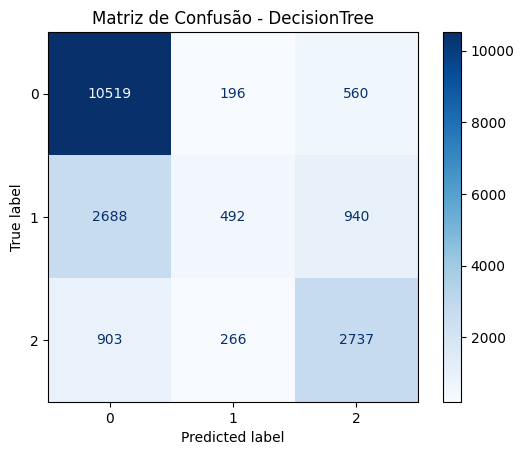

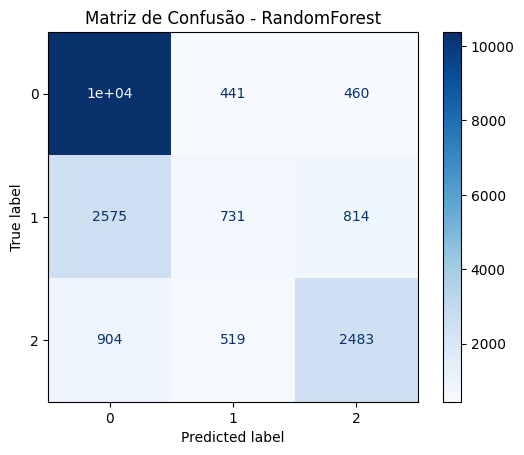

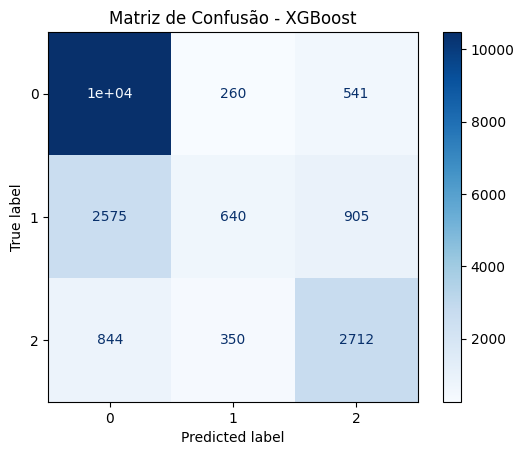

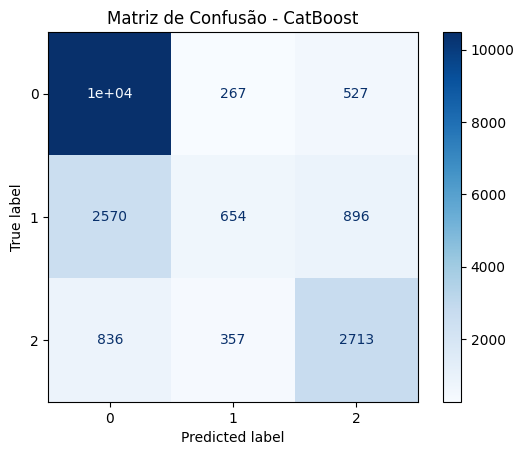

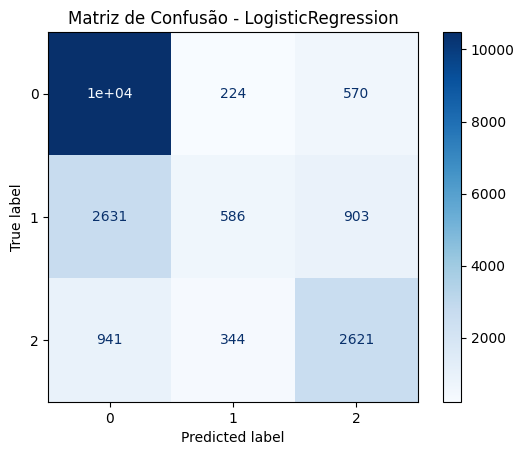

In [45]:
# Gerar matriz de confusão para cada modelo
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.show()

# 5. Análise da Importância das Features

In [46]:
import numpy as np
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

## Carregando as features em um dataframe e gerando gráfico apenas com as features com importância > 0.0

In [47]:
import pandas as pd
from sklearn.inspection import permutation_importance

# Inicializar um DataFrame global para armazenar todas as importâncias
feature_importance_df = pd.DataFrame()

# Função para calcular e armazenar a importância para um modelo
def calcular_importancia(model, X_test, y_test, model_name):
    global feature_importance_df
    perm_importance = permutation_importance(model, X_test, y_test, n_repeats=3, random_state=42, n_jobs=-1)  # n_repeats reduzido e n_jobs adicionado
    
    importance_vals = perm_importance.importances_mean
    importance_std = perm_importance.importances_std
    feature_importance_temp = pd.DataFrame({
        'Feature': X_test.columns,
        'Importância': importance_vals,
        'Desvio_Padrao': importance_std,
        'Modelo': model_name
    })
    
    # Concatenar uma única vez no final para melhorar a eficiência
    return feature_importance_temp

# Calcular importâncias para cada modelo
all_importances = []
all_importances.append(calcular_importancia(best_models['DecisionTree'], X_test, y_test, 'DecisionTree'))
all_importances.append(calcular_importancia(best_models['RandomForest'], X_test, y_test, 'RandomForest'))
all_importances.append(calcular_importancia(best_models['XGBoost'], X_test, y_test, 'XGBoost'))
all_importances.append(calcular_importancia(best_models['CatBoost'], X_test, y_test, 'CatBoost'))
all_importances.append(calcular_importancia(best_models['CatBoost'], X_test, y_test, 'LogisticRegression'))

# Concatenar todos os resultados de uma vez
feature_importance_df = pd.concat(all_importances, ignore_index=True)

# Visualizar o DataFrame com as importâncias de todos os modelos
print(feature_importance_df)


                                     Feature  Importância  Desvio_Padrao  \
0                                      idade     0.136763       0.002045   
1                                rf_feminino     0.003782       0.000293   
2                         rf_nao_deficiencia     0.019170       0.000448   
3                          rf_nao_le_escreve     0.000000       0.000000   
4                           rf_nao_trabalhou     0.000017       0.000024   
..                                       ...          ...            ...   
465    rf_atividade_principal_nao_remunerado     0.000052       0.000112   
466  rf_atividade_principal_militar_servidor     0.009222       0.000404   
467        rf_atividade_principal_empregador     0.000104       0.000042   
468        rf_atividade_principal_estagiario     0.000155       0.000042   
469                   cod_principal_aprendiz     0.000000       0.000000   

                 Modelo  
0          DecisionTree  
1          DecisionTree  
2        

In [48]:
feature_importance_df.head()

,Feature,Importância,Desvio_Padrao,Modelo
0,idade,0.136763,0.002045,DecisionTree
1,rf_feminino,0.003782,0.000293,DecisionTree
2,rf_nao_deficiencia,0.019170,0.000448,DecisionTree
3,rf_nao_le_escreve,0.000000,0.000000,DecisionTree
4,rf_nao_trabalhou,0.000017,0.000024,DecisionTree


In [49]:
# Filtrar apenas as features com importância > 0
feature_importance_df = feature_importance_df[feature_importance_df['Importância'] > 0.0]

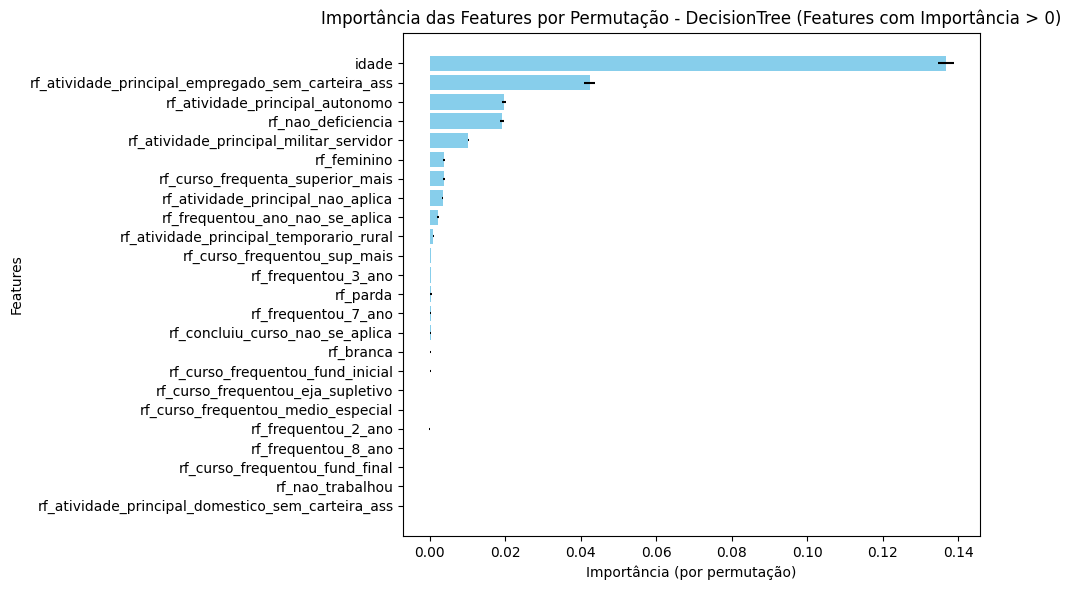

In [50]:
# Gerando um gráfico separado para cada modelo
# Filtrar e ordenar dados para o modelo DecisionTree
decision_tree_group = feature_importance_df[feature_importance_df['Modelo'] == 'DecisionTree']
decision_tree_group = decision_tree_group.sort_values(by='Importância', ascending=False)

# Plotar para o modelo DecisionTree
plt.figure(figsize=(10, 6))
plt.barh(decision_tree_group['Feature'], decision_tree_group['Importância'], 
         xerr=decision_tree_group['Desvio_Padrao'], color='skyblue')
plt.title("Importância das Features por Permutação - DecisionTree (Features com Importância > 0)")
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()



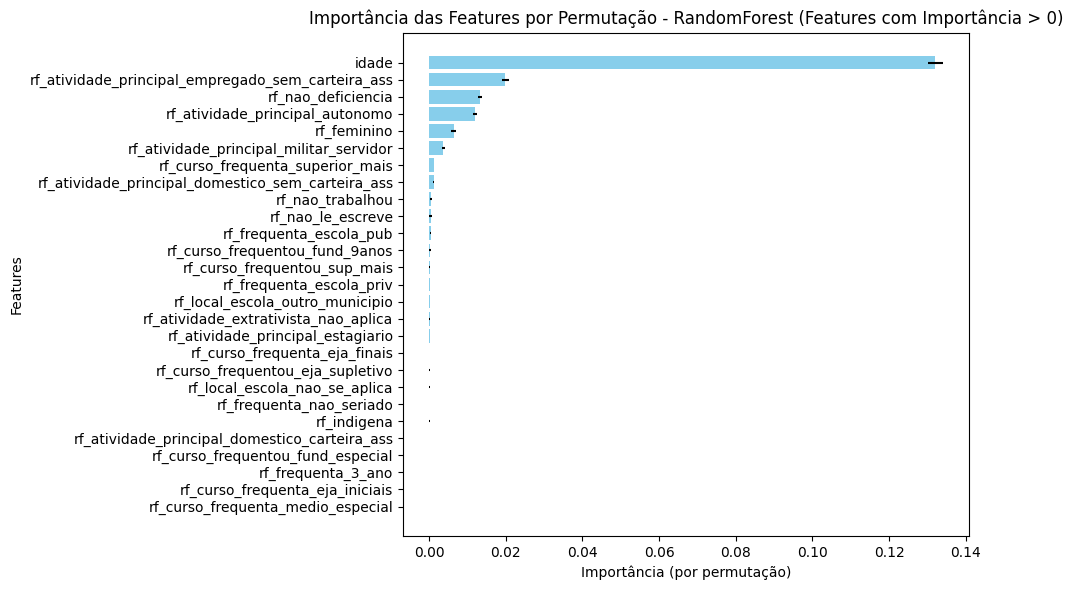

In [51]:
# Filtrar e ordenar dados para o modelo RandomForest
random_forest_group = feature_importance_df[feature_importance_df['Modelo'] == 'RandomForest']
random_forest_group = random_forest_group.sort_values(by='Importância', ascending=False)

# Plotar para o modelo RandomForest
plt.figure(figsize=(10, 6))
plt.barh(random_forest_group['Feature'], random_forest_group['Importância'], 
         xerr=random_forest_group['Desvio_Padrao'], color='skyblue')
plt.title("Importância das Features por Permutação - RandomForest (Features com Importância > 0)")
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


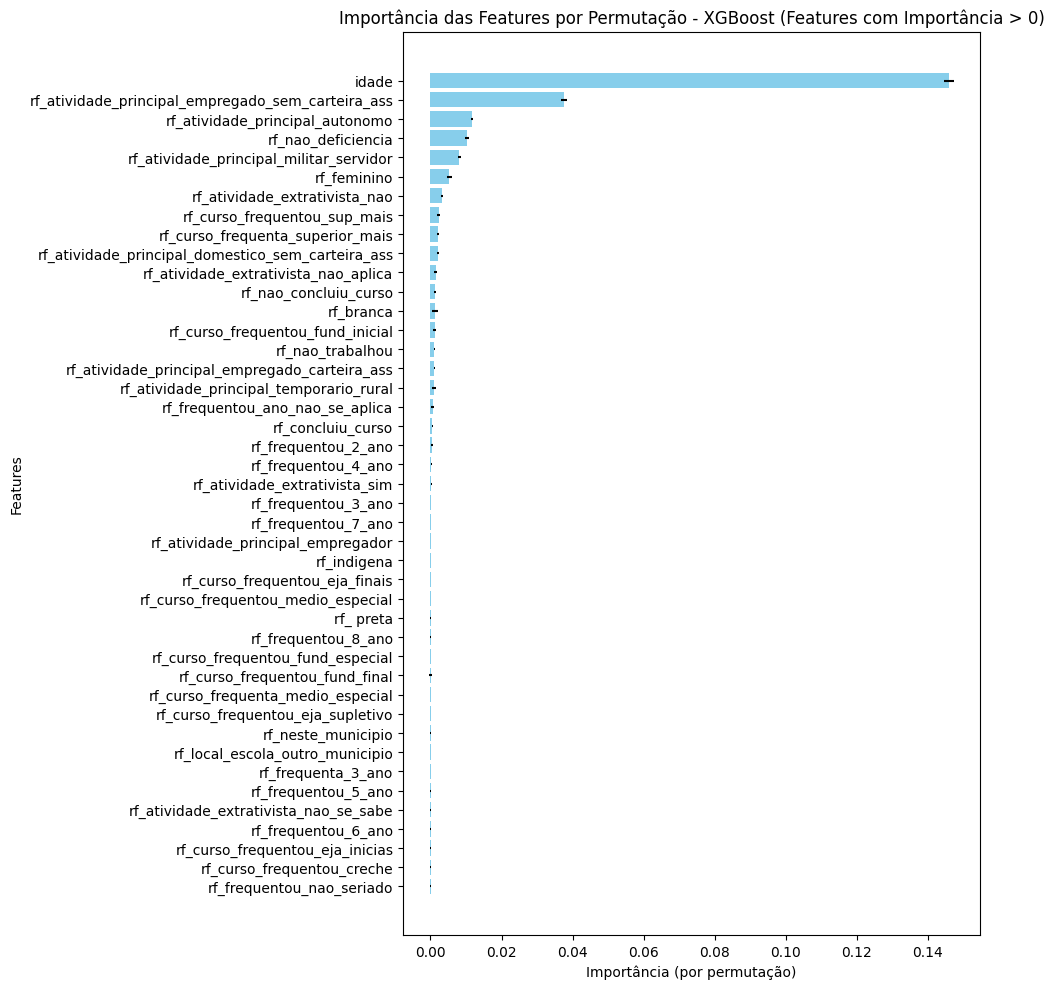

In [52]:
# Filtrar e ordenar dados para o modelo XGBoost
xgboost_group = feature_importance_df[feature_importance_df['Modelo'] == 'XGBoost']
xgboost_group = xgboost_group.sort_values(by='Importância', ascending=False)

# Plotar para o modelo XGBoost
plt.figure(figsize=(10, 10))
plt.barh(xgboost_group['Feature'], xgboost_group['Importância'], 
         xerr=xgboost_group['Desvio_Padrao'], color='skyblue')
plt.title("Importância das Features por Permutação - XGBoost (Features com Importância > 0)")
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


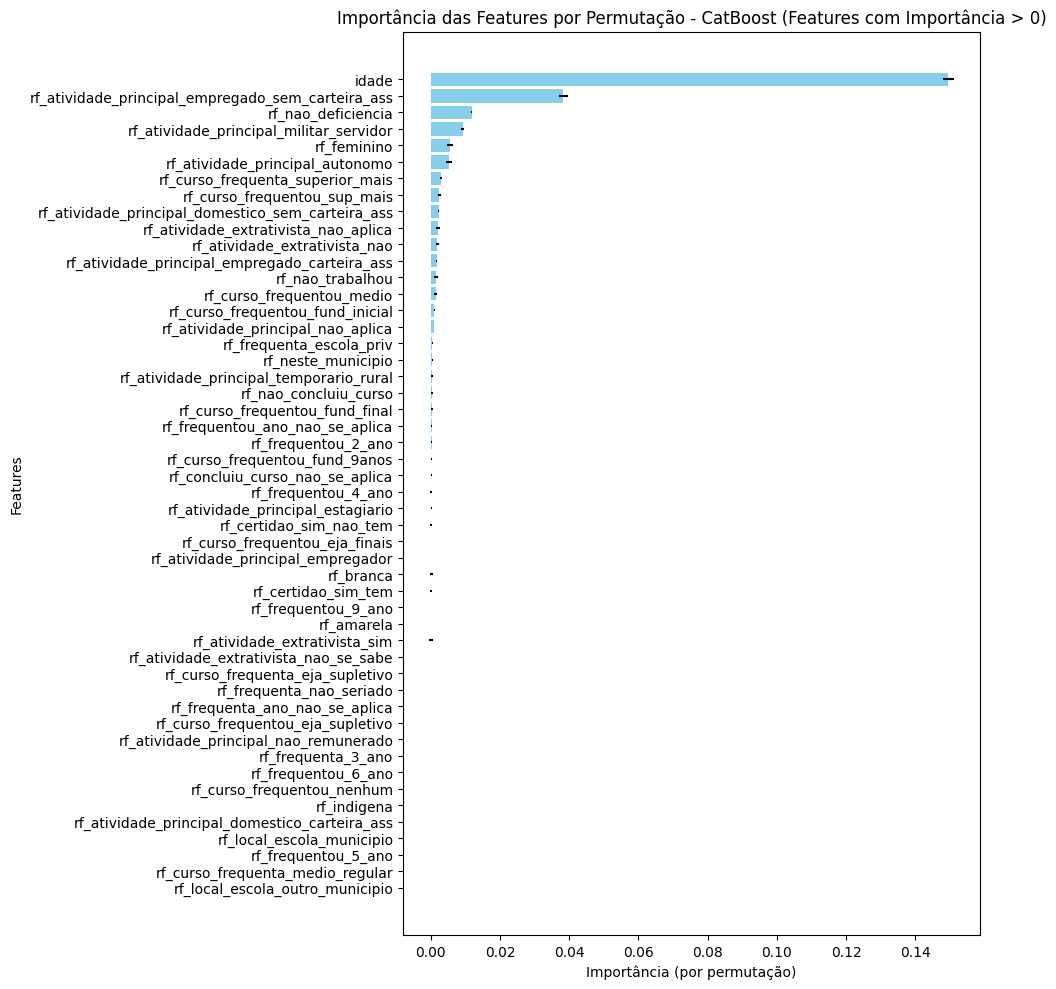

In [53]:
# Filtrar e ordenar dados para o modelo CatBoost
catboost_group = feature_importance_df[feature_importance_df['Modelo'] == 'CatBoost']
catboost_group = catboost_group.sort_values(by='Importância', ascending=False)

# Plotar para o modelo CatBoost
plt.figure(figsize=(10, 10))
plt.barh(catboost_group['Feature'], catboost_group['Importância'], 
         xerr=catboost_group['Desvio_Padrao'], color='skyblue')
plt.title("Importância das Features por Permutação - CatBoost (Features com Importância > 0)")
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


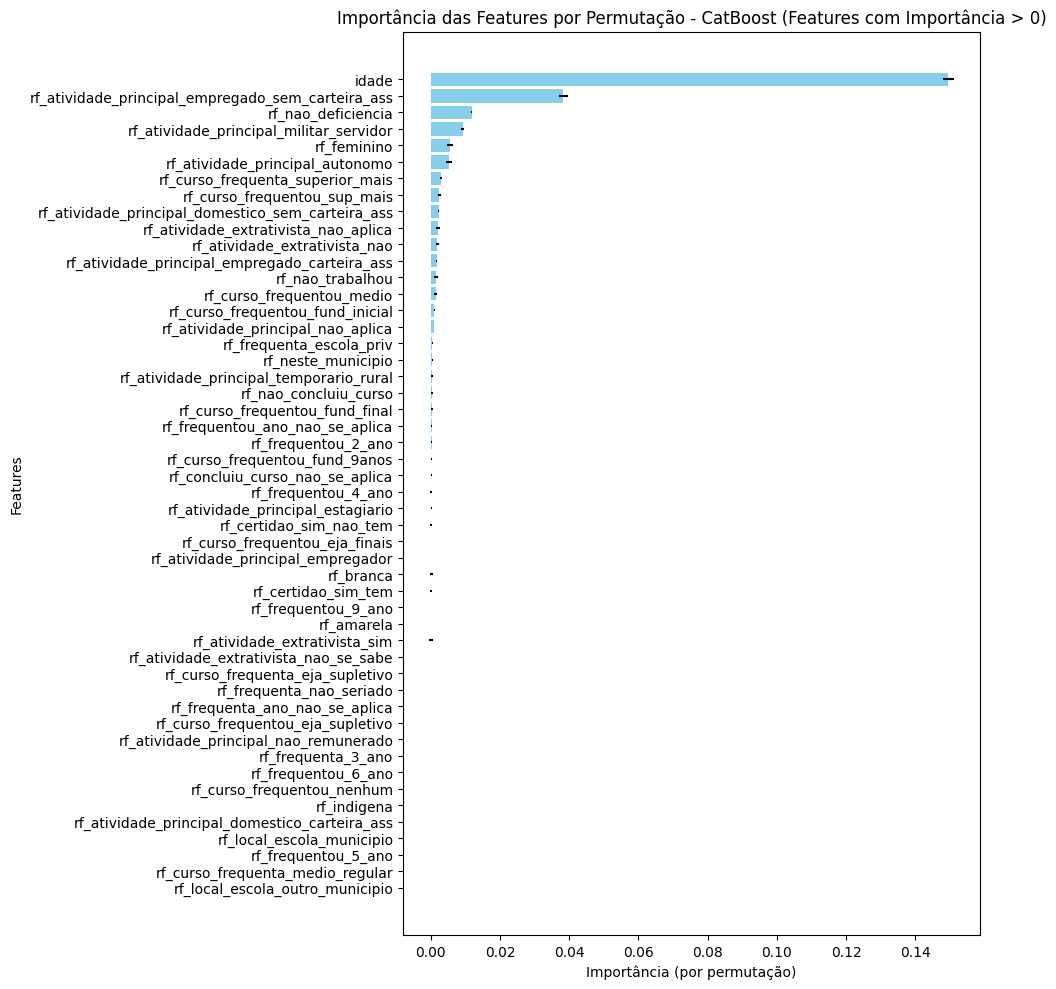

In [54]:
# Filtrar e ordenar dados para o modelo CatBoost
catboost_group = feature_importance_df[feature_importance_df['Modelo'] == 'LogisticRegression']
catboost_group = catboost_group.sort_values(by='Importância', ascending=False)

# Plotar para o modelo CatBoost
plt.figure(figsize=(10, 10))
plt.barh(catboost_group['Feature'], catboost_group['Importância'], 
         xerr=catboost_group['Desvio_Padrao'], color='skyblue')
plt.title("Importância das Features por Permutação - CatBoost (Features com Importância > 0)")
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


In [55]:
# Lista para armazenar os 10 principais features de cada modelo
top_10_features_per_model = {}

# Obter os 10 principais features para cada modelo
for model_name in feature_importance_df['Modelo'].unique():
    # Filtrar e ordenar as features para o modelo específico
    model_group = feature_importance_df[feature_importance_df['Modelo'] == model_name]
    model_group = model_group.sort_values(by='Importância', ascending=False).head(10)
    
    # Adicionar ao dicionário
    top_10_features_per_model[model_name] = model_group[['Feature', 'Importância']]

# Exibir os 10 principais features de cada modelo
for model_name, top_features in top_10_features_per_model.items():
    print(f"\nTop 10 Features para o modelo {model_name}:\n")
    print(top_features.to_string(index=False))


Top 10 Features para o modelo DecisionTree:

                                          Feature  Importância
                                            idade     0.136763
rf_atividade_principal_empregado_sem_carteira_ass     0.042381
                  rf_atividade_principal_autonomo     0.019774
                               rf_nao_deficiencia     0.019170
          rf_atividade_principal_militar_servidor     0.010293
                                      rf_feminino     0.003782
                 rf_curso_frequenta_superior_mais     0.003782
                rf_atividade_principal_nao_aplica     0.003420
                  rf_frequentou_ano_nao_se_aplica     0.002245
          rf_atividade_principal_temporario_rural     0.000933

Top 10 Features para o modelo RandomForest:

                                          Feature  Importância
                                            idade     0.132083
rf_atividade_principal_empregado_sem_carteira_ass     0.019930
                          

# Avaliando o balanceamento das classes

In [56]:
# Verificar a distribuição da variável target
target_distribution = y.value_counts(normalize=True)

In [57]:
print("Distribuição da variável target 'classe_renda':")
print(target_distribution)

Distribuição da variável target 'classe_renda':
classe_renda
0    0.584164
1    0.213436
2    0.202400
Name: proportion, dtype: float64


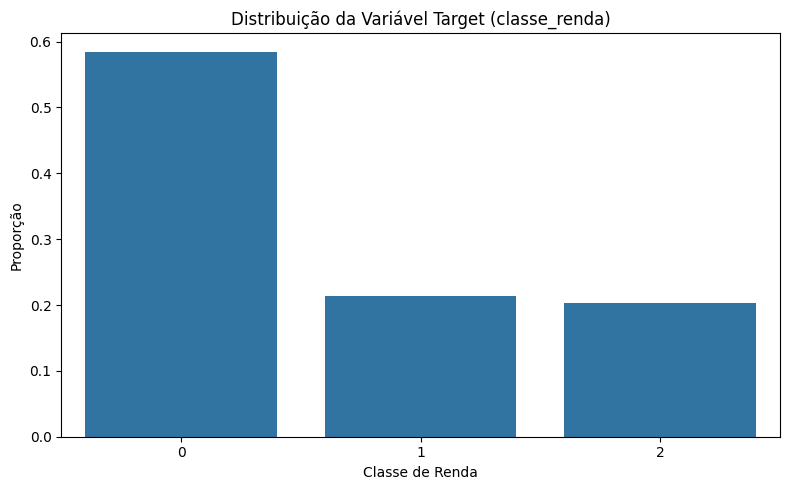

In [58]:
# Plotar a distribuição da variável target
plt.figure(figsize=(8, 5))
sns.barplot(x=target_distribution.index, y=target_distribution.values)
plt.title('Distribuição da Variável Target (classe_renda)')
plt.xlabel('Classe de Renda')
plt.ylabel('Proporção')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [59]:
# Exibir o número absoluto de ocorrências por classe
absolute_distribution = y.value_counts()

print("\nNúmero absoluto de ocorrências por classe:")
print(absolute_distribution)


Número absoluto de ocorrências por classe:
classe_renda
0    56373
1    20597
2    19532
Name: count, dtype: int64


## Balanceando as classes

In [60]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [61]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [62]:
# Primeiro, aplica-se o SMOTE para criar amostras sintéticas das classes minoritárias
# Depois, faz-se undersampling para reduzir a classe majoritária a um tamanho mais equilibrado
over = SMOTE(sampling_strategy={1.0: 35000, 2.0: 35000})  # Aumenta as classes 1 e 2 para 35k cada
under = RandomUnderSampler(sampling_strategy={0.0: 40000})  # Reduz a classe 0 para 40k

In [63]:
# Criar um pipeline que aplica SMOTE e depois o undersampling
pipeline = Pipeline(steps=[('o', over), ('u', under)])

In [64]:
# Aplicar o balanceamento ao conjunto de dados
X_balanced, y_balanced = pipeline.fit_resample(X, y)

In [65]:
# Verificar a nova distribuição das classes
balanced_distribution = pd.Series(y_balanced).value_counts()

print("Distribuição da variável target 'classe_renda' após o balanceamento:")
print(balanced_distribution)

Distribuição da variável target 'classe_renda' após o balanceamento:
classe_renda
0    40000
1    35000
2    35000
Name: count, dtype: int64


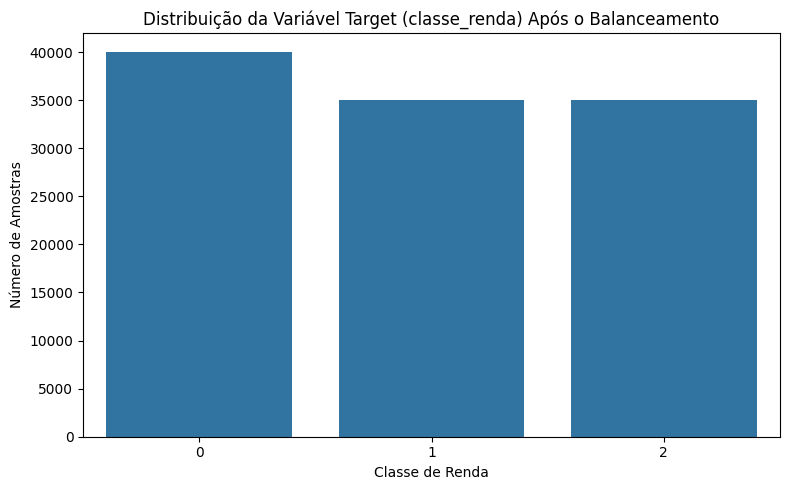

In [66]:
# Visualizar a distribuição das classes após o balanceamento
plt.figure(figsize=(8, 5))
sns.barplot(x=balanced_distribution.index, y=balanced_distribution.values)
plt.title('Distribuição da Variável Target (classe_renda) Após o Balanceamento')
plt.xlabel('Classe de Renda')
plt.ylabel('Número de Amostras')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Refazendo as análises dos modelos após balanceamento das classes

In [67]:
X_balanced.head()

,idade,rf_feminino,rf_nao_deficiencia,rf_nao_le_escreve,rf_nao_trabalhou,rf_branca,rf_ preta,rf_amarela,rf_parda,rf_indigena,...,rf_atividade_principal_temporario_rural,rf_atividade_principal_empregado_carteira_ass,rf_atividade_principal_empregado_sem_carteira_ass,rf_atividade_principal_domestico_carteira_ass,rf_atividade_principal_domestico_sem_carteira_ass,rf_atividade_principal_nao_remunerado,rf_atividade_principal_militar_servidor,rf_atividade_principal_empregador,rf_atividade_principal_estagiario,cod_principal_aprendiz
16412,0.318966,1,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
75459,0.043103,1,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
34461,0.284483,1,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
12675,0.172414,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94252,0.043103,1,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
print(X_balanced.shape)
print(y_balanced.shape)

(110000, 94)
(110000,)


In [69]:
print(y_balanced.shape)
print(y.shape)  # Verifique se y é igual a y_balanced

(110000,)
(96502,)


In [70]:
# Dividir os dados em treino e teste após balanceamento
X_balanced_train, X_balanced_test, y_balanced_train, y_balanced_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [71]:
# Definir os modelos e os parâmetros
models_balanced = {
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'classifier__max_depth': [3, 5, 7],
            'classifier__min_samples_split': [2, 5, 10]
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'param_grid': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [None, 10, 20]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(objective='multi:softmax', num_class=3, random_state=42),
        'param_grid': {
            'classifier__n_estimators': [250, 300],
            'classifier__max_depth': [3, 5],
            'classifier__learning_rate': [0.1]
        }
    },
    'CatBoost': {
        'model': CatBoostClassifier(silent=True),
        'param_grid': {
            'classifier__iterations': [250, 500],
            'classifier__depth': [3, 5],
            'classifier__learning_rate': [0.1]
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000),
        'param_grid': {
            'classifier__C': [0.1, 1, 10],
            'classifier__solver': ['lbfgs', 'liblinear']
        }
    }
}



In [72]:
# Criar um dicionário para armazenar os melhores modelos
best_models_balanced = {}

for model_name, model_info in models_balanced.items():
    # Criar o pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model_info['model'])
    ])
    
    # Definir GridSearchCV usando as features e classes balanceadas
    grid_search = GridSearchCV(pipeline, model_info['param_grid'], cv=3, scoring='f1_macro', n_jobs=-1)
    grid_search.fit(X_balanced_train, y_balanced_train)  # Usando dados balanceados
    
    # Armazenar o melhor modelo
    best_models_balanced[model_name] = grid_search.best_estimator_
    print(f"Melhores hiperparâmetros para {model_name} (usando dados balanceados): {grid_search.best_params_}")



Melhores hiperparâmetros para DecisionTree (usando dados balanceados): {'classifier__max_depth': 5, 'classifier__min_samples_split': 2}
Melhores hiperparâmetros para RandomForest (usando dados balanceados): {'classifier__max_depth': 20, 'classifier__n_estimators': 100}
Melhores hiperparâmetros para XGBoost (usando dados balanceados): {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 300}
Melhores hiperparâmetros para CatBoost (usando dados balanceados): {'classifier__depth': 5, 'classifier__iterations': 500, 'classifier__learning_rate': 0.1}
Melhores hiperparâmetros para LogisticRegression (usando dados balanceados): {'classifier__C': 0.1, 'classifier__solver': 'lbfgs'}


In [73]:
# Avaliar todos os modelos usando dados balanceados
for model_name, model in best_models_balanced.items():
    y_pred = model.predict(X_balanced_test)  # Usando dados de teste balanceados

    # Calcular F1 Score
    f1 = f1_score(y_balanced_test, y_pred, average='macro')

    # Calcular Acurácia
    accuracy = accuracy_score(y_balanced_test, y_pred)

    # Exibir os resultados
    print(f"Modelo (usando dados balanceados): {model_name}")
    print(f"  F1 Score: {f1:.2f}")
    print(f"  Acurácia: {accuracy:.2f}")


Modelo (usando dados balanceados): DecisionTree
  F1 Score: 0.59
  Acurácia: 0.60
Modelo (usando dados balanceados): RandomForest
  F1 Score: 0.64
  Acurácia: 0.65
Modelo (usando dados balanceados): XGBoost
  F1 Score: 0.63
  Acurácia: 0.64
Modelo (usando dados balanceados): CatBoost
  F1 Score: 0.64
  Acurácia: 0.66
Modelo (usando dados balanceados): LogisticRegression
  F1 Score: 0.60
  Acurácia: 0.62


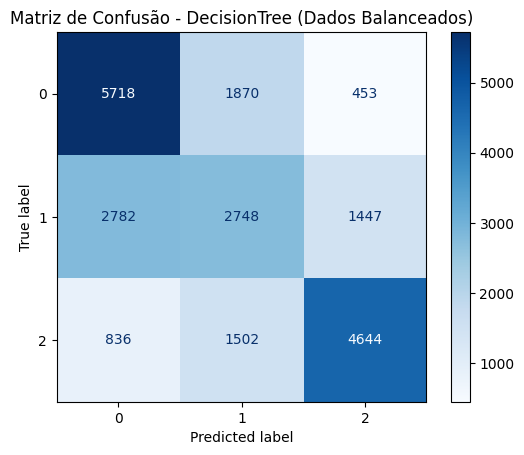

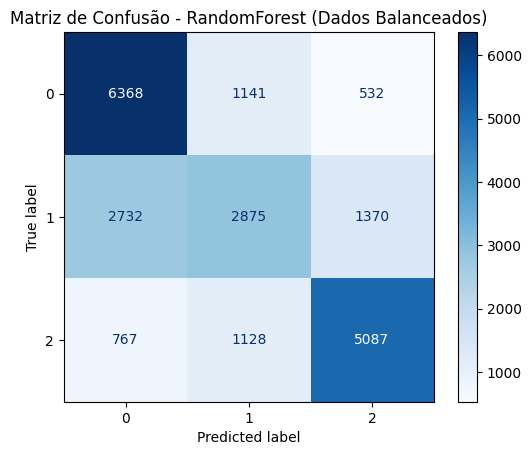

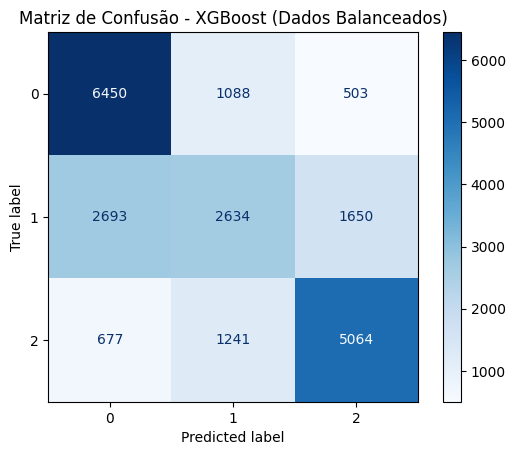

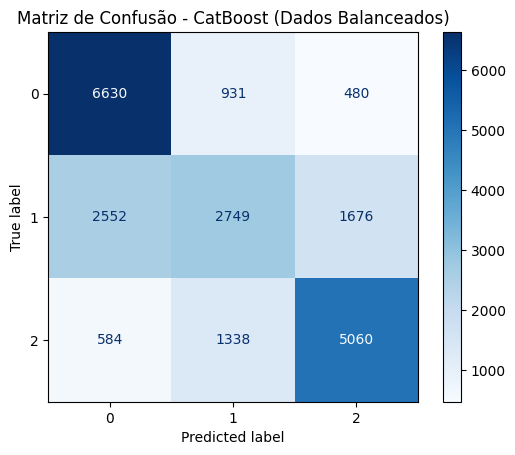

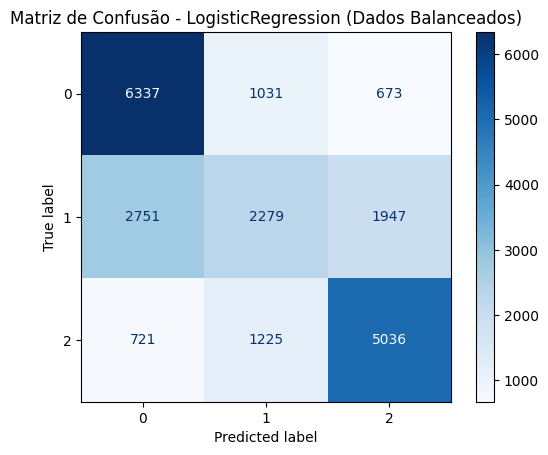

In [74]:
# Gerar matriz de confusão para cada modelo usando dados balanceados
for model_name, model in best_models_balanced.items():
    y_pred = model.predict(X_balanced_test)  # Usar os dados de teste balanceados
    
    # Gerar a matriz de confusão
    ConfusionMatrixDisplay.from_estimator(model, X_balanced_test, y_balanced_test, cmap='Blues')
    plt.title(f'Matriz de Confusão - {model_name} (Dados Balanceados)')
    plt.show()

## Carregando as features em um dataframe e gerando gráfico apenas com as features com importância > 0.0

In [75]:
# Inicializar um DataFrame para armazenar importâncias
feature_importance_df_balanced = pd.DataFrame()

In [76]:
import pandas as pd
from sklearn.inspection import permutation_importance

# Inicializar um DataFrame global para armazenar todas as importâncias
feature_importance_df_balanced = pd.DataFrame()

# Função para calcular e armazenar a importância para um modelo
def calcular_importancia(model, X_balanced_test, y_balanced_test, model_name):
    global feature_importance_df
    perm_importance = permutation_importance(model, X_balanced_test, y_balanced_test, n_repeats=3, random_state=42, n_jobs=-1)  # n_repeats reduzido e n_jobs adicionado
    
    importance_vals = perm_importance.importances_mean
    importance_std = perm_importance.importances_std
    feature_importance_temp = pd.DataFrame({
        'Feature': X_balanced_test.columns,
        'Importância': importance_vals,
        'Desvio_Padrao': importance_std,
        'Modelo': model_name
    })
    
    # Concatenar uma única vez no final para melhorar a eficiência
    return feature_importance_temp

# Calcular importâncias para cada modelo
all_importances = []
all_importances.append(calcular_importancia(best_models_balanced['DecisionTree'], X_balanced_test, y_balanced_test, 'DecisionTree'))
all_importances.append(calcular_importancia(best_models_balanced['RandomForest'], X_balanced_test, y_balanced_test, 'RandomForest'))
all_importances.append(calcular_importancia(best_models_balanced['XGBoost'], X_balanced_test, y_balanced_test, 'XGBoost'))
all_importances.append(calcular_importancia(best_models_balanced['CatBoost'], X_balanced_test, y_balanced_test, 'CatBoost'))
all_importances.append(calcular_importancia(best_models_balanced['CatBoost'], X_balanced_test, y_balanced_test, 'LogisticRegression'))

# Concatenar todos os resultados de uma vez
feature_importance_df_balanced = pd.concat(all_importances, ignore_index=True)

# Visualizar o DataFrame com as

In [77]:
# Filtrar apenas as features com importância > 0
feature_importance_df_balanced = feature_importance_df_balanced[feature_importance_df_balanced['Importância'] > 0.0]

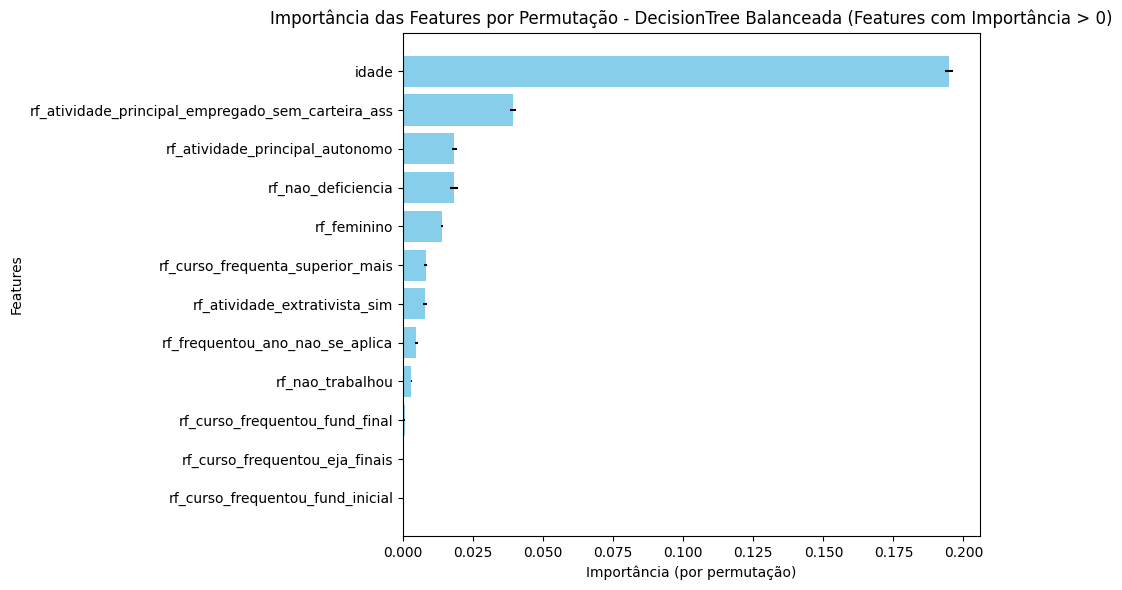

In [78]:
# Gerando um gráfico separado para cada modelo
# Filtrar e ordenar dados para o modelo DecisionTree
decision_tree_group = feature_importance_df_balanced[feature_importance_df_balanced['Modelo'] == 'DecisionTree']
decision_tree_group = decision_tree_group.sort_values(by='Importância', ascending=False)

# Plotar para o modelo DecisionTree
plt.figure(figsize=(10, 6))
plt.barh(decision_tree_group['Feature'], decision_tree_group['Importância'], 
         xerr=decision_tree_group['Desvio_Padrao'], color='skyblue')
plt.title("Importância das Features por Permutação - DecisionTree Balanceada (Features com Importância > 0)")
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()



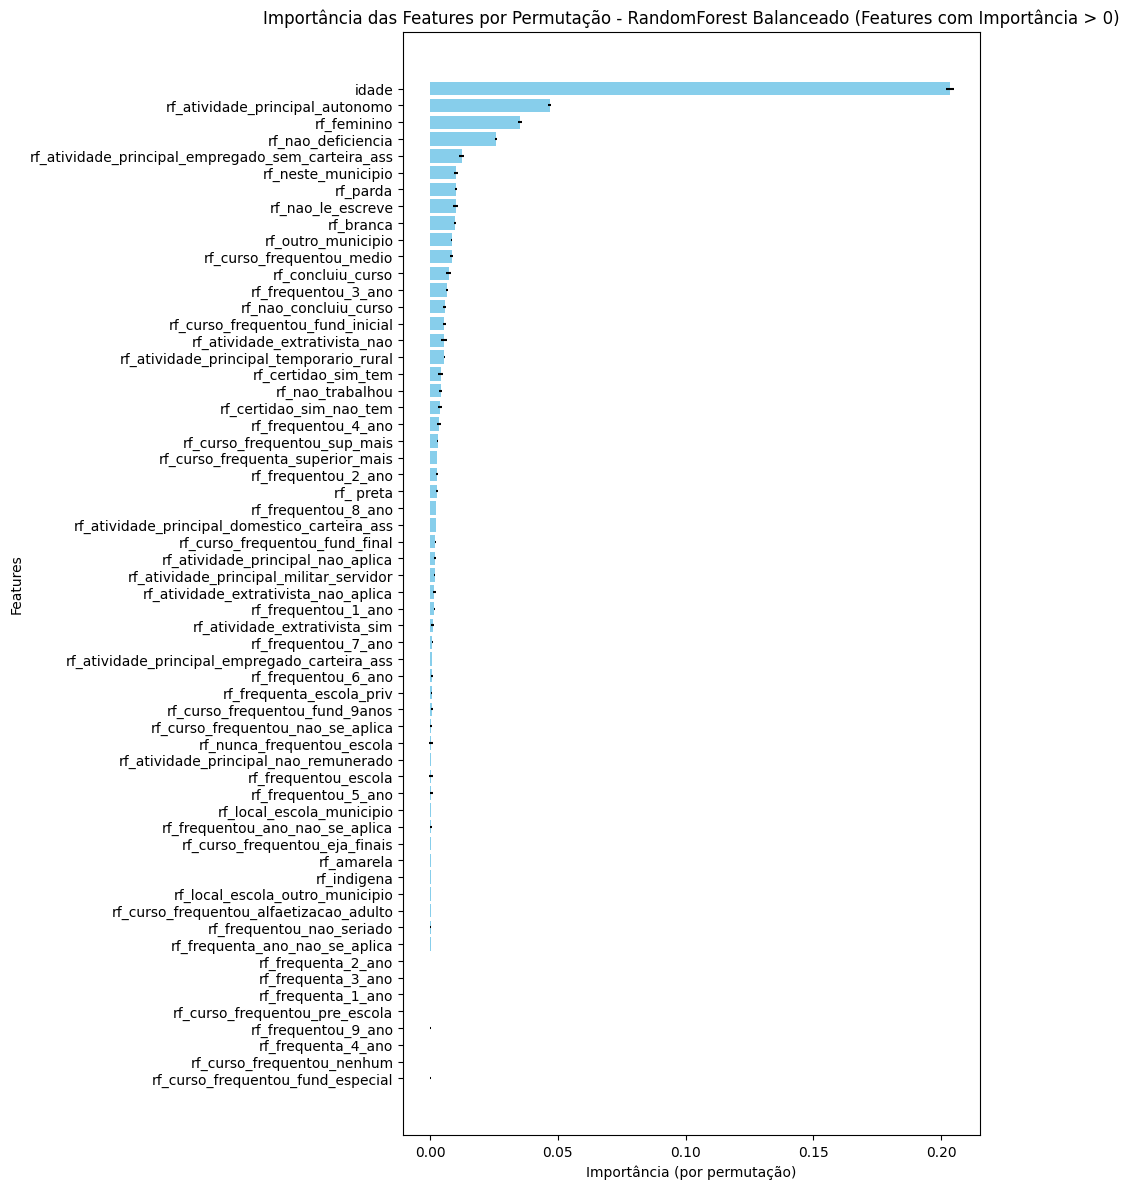

In [79]:
# Filtrar e ordenar dados para o modelo RandomForest Balanceado
random_forest_group = feature_importance_df_balanced[feature_importance_df_balanced['Modelo'] == 'RandomForest']
random_forest_group = random_forest_group.sort_values(by='Importância', ascending=False)

# Plotar para o modelo RandomForest
plt.figure(figsize=(10, 12))
plt.barh(random_forest_group['Feature'], random_forest_group['Importância'], 
         xerr=random_forest_group['Desvio_Padrao'], color='skyblue')
plt.title("Importância das Features por Permutação - RandomForest Balanceado (Features com Importância > 0)")
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


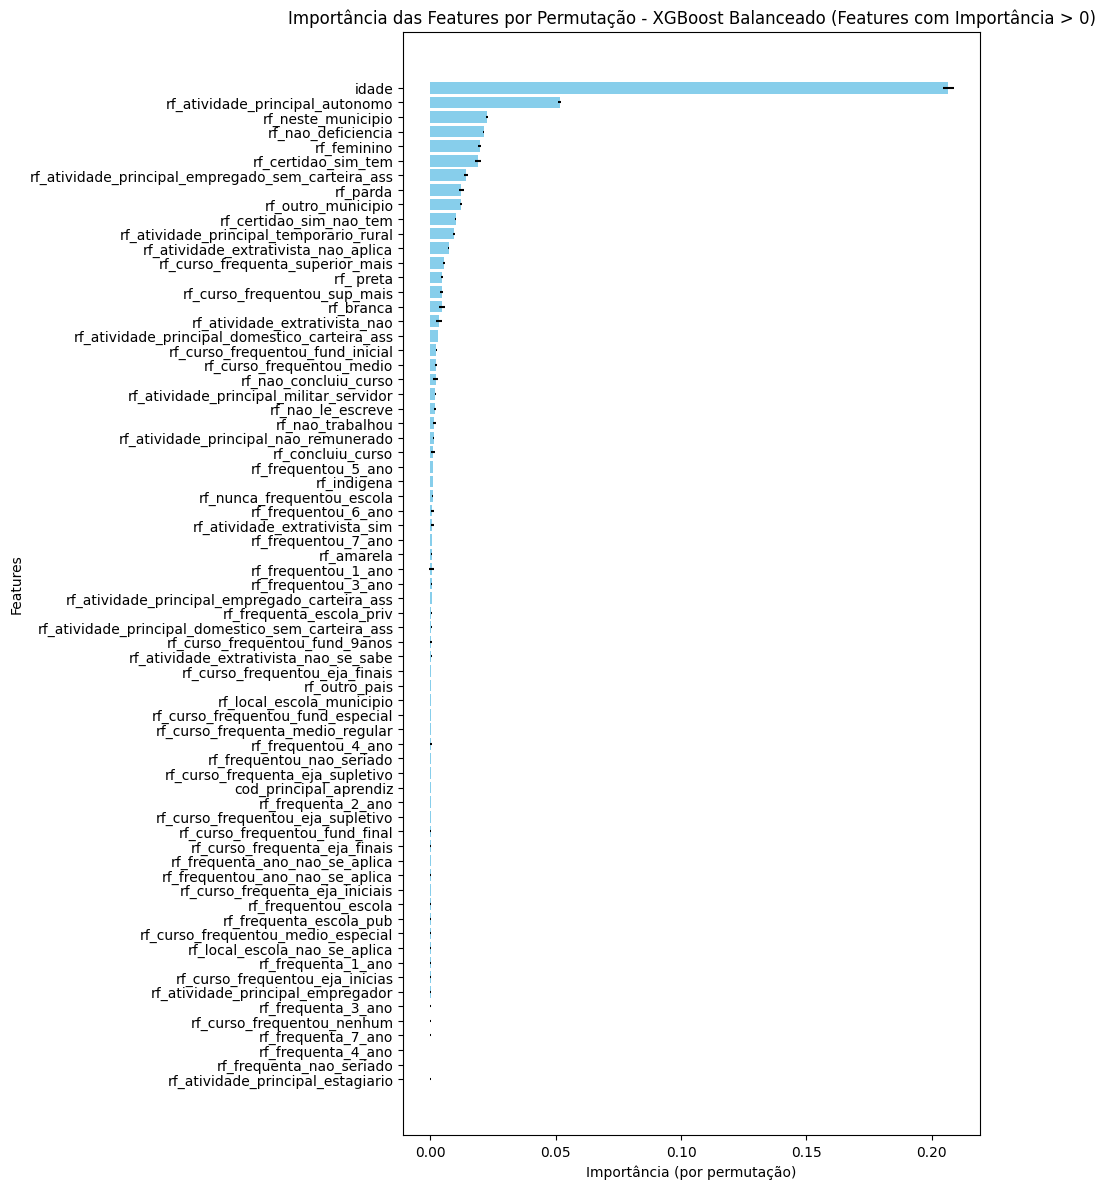

In [80]:
# Filtrar e ordenar dados para o modelo XGBoost Balanceado
xgboost_group = feature_importance_df_balanced[feature_importance_df_balanced['Modelo'] == 'XGBoost']
xgboost_group = xgboost_group.sort_values(by='Importância', ascending=False)

# Plotar para o modelo XGBoost
plt.figure(figsize=(10, 12))
plt.barh(xgboost_group['Feature'], xgboost_group['Importância'], 
         xerr=xgboost_group['Desvio_Padrao'], color='skyblue')
plt.title("Importância das Features por Permutação - XGBoost Balanceado (Features com Importância > 0)")
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

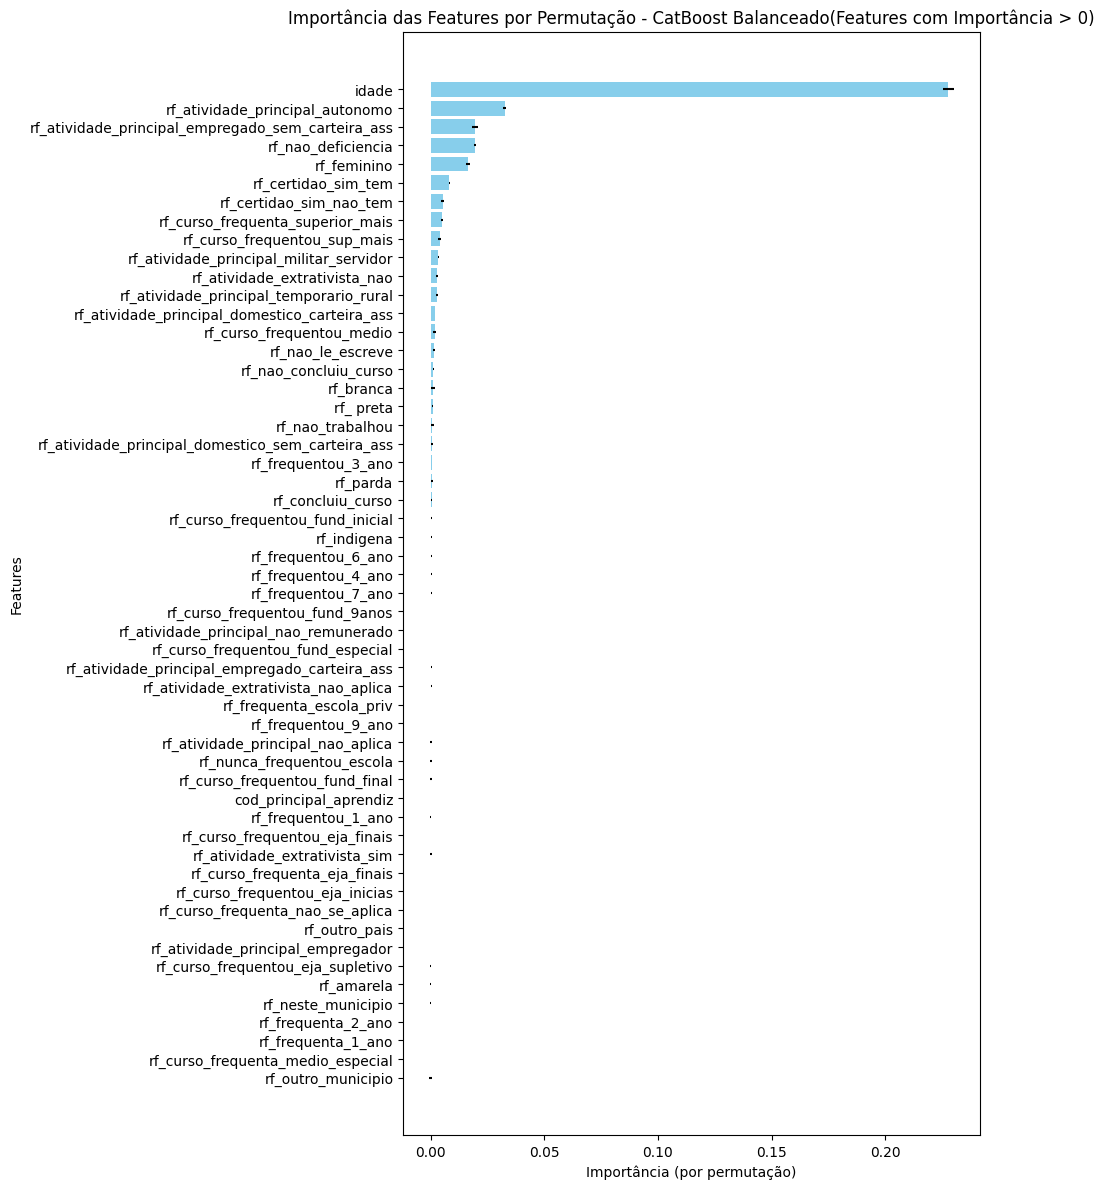

In [81]:
# Filtrar e ordenar dados para o modelo CatBoost Balanceado
catboost_group = feature_importance_df_balanced[feature_importance_df_balanced['Modelo'] == 'CatBoost']
catboost_group = catboost_group.sort_values(by='Importância', ascending=False)

# Plotar para o modelo CatBoost
plt.figure(figsize=(10, 12))
plt.barh(catboost_group['Feature'], catboost_group['Importância'], 
         xerr=catboost_group['Desvio_Padrao'], color='skyblue')
plt.title("Importância das Features por Permutação - CatBoost Balanceado(Features com Importância > 0)")
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

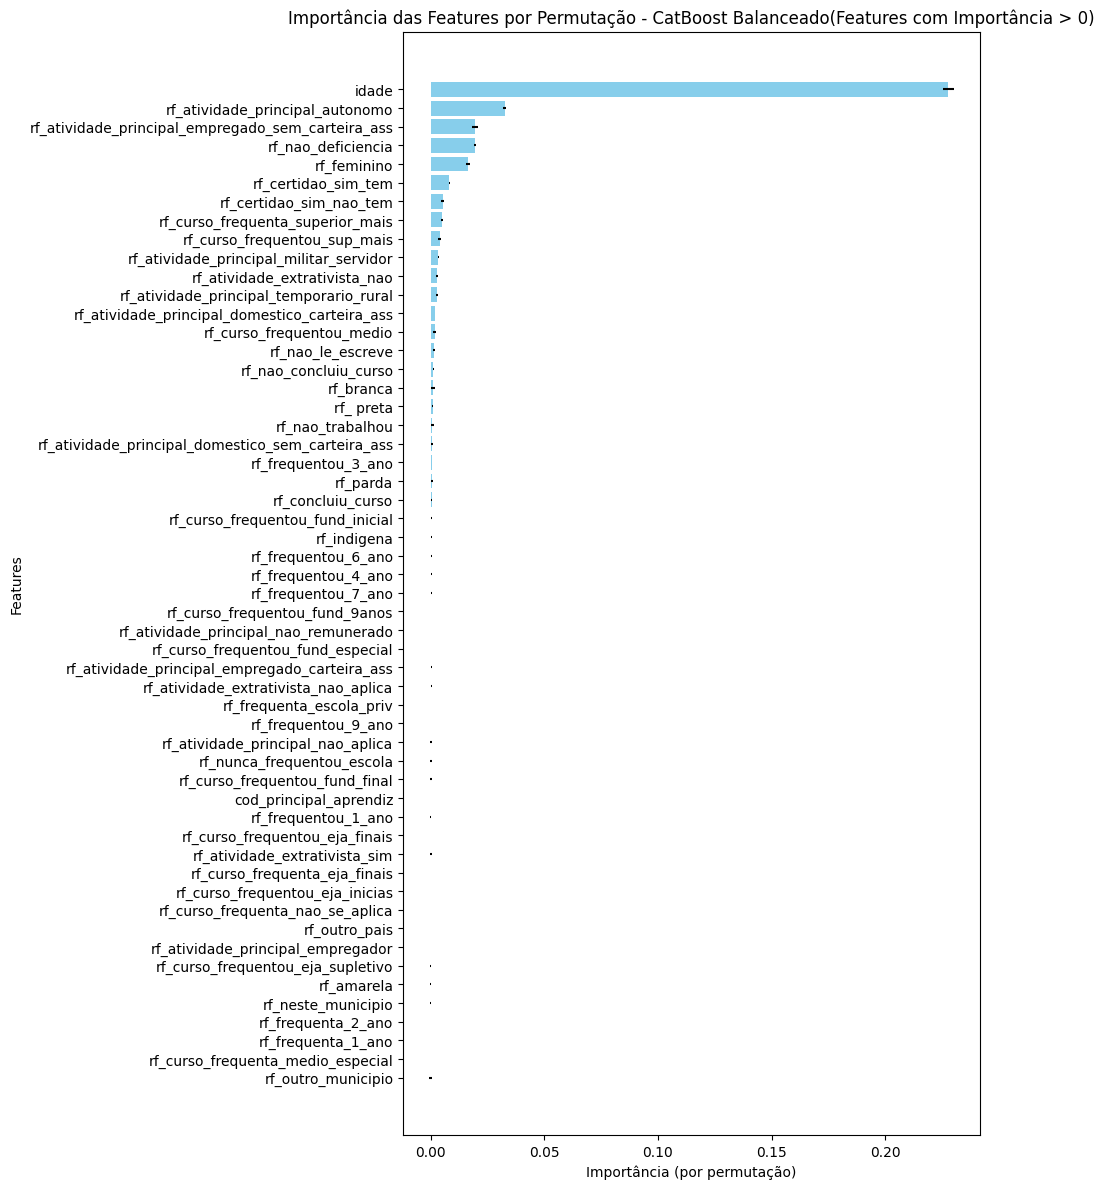

In [82]:
# Filtrar e ordenar dados para o modelo Regressão Logística Balanceado
catboost_group = feature_importance_df_balanced[feature_importance_df_balanced['Modelo'] == 'LogisticRegression']
catboost_group = catboost_group.sort_values(by='Importância', ascending=False)

# Plotar para o modelo CatBoost
plt.figure(figsize=(10, 12))
plt.barh(catboost_group['Feature'], catboost_group['Importância'], 
         xerr=catboost_group['Desvio_Padrao'], color='skyblue')
plt.title("Importância das Features por Permutação - CatBoost Balanceado(Features com Importância > 0)")
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

# Comparando a performance antes e após o balanceamento

In [83]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
from sklearn.inspection import permutation_importance

In [84]:
# Lista para armazenar as métricas de desempenho
performance_comparison = []

# Avaliar modelos antes do balanceamento
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    
    # Calcular F1 Score e Acurácia
    f1_before = f1_score(y_test, y_pred, average='macro')
    accuracy_before = accuracy_score(y_test, y_pred)
    
    # Armazenar os resultados antes do balanceamento
    performance_comparison.append({
        'Modelo': model_name,
        'F1 Score Antes do Balanceamento': f1_before,
        'Acurácia Antes do Balanceamento': accuracy_before,
        'F1 Score Após o Balanceamento': None,  # Inicializa como None
        'Acurácia Após o Balanceamento': None,  # Inicializa como None
    })


In [85]:
# Avaliar modelos após o balanceamento
for model_name, model in best_models_balanced.items():
    y_pred_balanced = model.predict(X_balanced_test)
    
    # Calcular F1 Score e Acurácia
    f1_balanced = f1_score(y_balanced_test, y_pred_balanced, average='macro')
    accuracy_after = accuracy_score(y_balanced_test, y_pred_balanced)
    
    # Adicionar os resultados após o balanceamento ao mesmo dicionário
    for entry in performance_comparison:
        if entry['Modelo'] == model_name:
            entry['F1 Score Após o Balanceamento'] = f1_balanced
            entry['Acurácia Após o Balanceamento'] = accuracy_after



In [86]:
# Criar DataFrame para as métricas de desempenho
performance_df = pd.DataFrame(performance_comparison)

# Exibir o DataFrame de desempenho
performance_df.head(10)


,Modelo,F1 Score Antes do Balanceamento,Acurácia Antes do Balanceamento,F1 Score Após o Balanceamento,Acurácia Após o Balanceamento
0,DecisionTree,0.564974,0.712295,0.588142,0.595909
1,RandomForest,0.575111,0.704005,0.637932,0.651364
2,XGBoost,0.581102,0.716336,0.625580,0.643091
3,CatBoost,0.583367,0.717476,0.638595,0.656318
4,LogisticRegression,0.568365,0.709186,0.598012,0.620545


In [87]:
# Lista para armazenar os 10 principais features de cada modelo
top_10_features_per_model = {}

# Obter os 10 principais features para cada modelo
for model_name in feature_importance_df['Modelo'].unique():
    # Filtrar e ordenar as features para o modelo específico
    model_group = feature_importance_df[feature_importance_df['Modelo'] == model_name]
    model_group = model_group.sort_values(by='Importância', ascending=False).head(10)
    
    # Adicionar ao dicionário
    top_10_features_per_model[model_name] = model_group[['Feature', 'Importância']]

# Exibir os 10 principais features de cada modelo
for model_name, top_features in top_10_features_per_model.items():
    print(f"\nTop 10 Features para o modelo {model_name}:\n")
    print(top_features.to_string(index=False))




Top 10 Features para o modelo DecisionTree:

                                          Feature  Importância
                                            idade     0.136763
rf_atividade_principal_empregado_sem_carteira_ass     0.042381
                  rf_atividade_principal_autonomo     0.019774
                               rf_nao_deficiencia     0.019170
          rf_atividade_principal_militar_servidor     0.010293
                                      rf_feminino     0.003782
                 rf_curso_frequenta_superior_mais     0.003782
                rf_atividade_principal_nao_aplica     0.003420
                  rf_frequentou_ano_nao_se_aplica     0.002245
          rf_atividade_principal_temporario_rural     0.000933

Top 10 Features para o modelo RandomForest:

                                          Feature  Importância
                                            idade     0.132083
rf_atividade_principal_empregado_sem_carteira_ass     0.019930
                          

In [88]:
# Lista para armazenar os 10 principais features de cada modelo balanceado
top_10_features_per_model_balanced = {}

# Obter os 10 principais features para cada modelo
for model_name in feature_importance_df_balanced['Modelo'].unique():
    # Filtrar e ordenar as features para o modelo específico
    model_group = feature_importance_df_balanced[feature_importance_df_balanced['Modelo'] == model_name]
    model_group = model_group.sort_values(by='Importância', ascending=False).head(10)
    
    # Adicionar ao dicionário
    top_10_features_per_model_balanced[model_name] = model_group[['Feature', 'Importância']]

# Exibir os 10 principais features de cada modelo
for model_name, top_features in top_10_features_per_model.items():
    print(f"\nTop 10 Features para o modelo {model_name} balanceado:\n")
    print(top_features.to_string(index=False))




Top 10 Features para o modelo DecisionTree balanceado:

                                          Feature  Importância
                                            idade     0.136763
rf_atividade_principal_empregado_sem_carteira_ass     0.042381
                  rf_atividade_principal_autonomo     0.019774
                               rf_nao_deficiencia     0.019170
          rf_atividade_principal_militar_servidor     0.010293
                                      rf_feminino     0.003782
                 rf_curso_frequenta_superior_mais     0.003782
                rf_atividade_principal_nao_aplica     0.003420
                  rf_frequentou_ano_nao_se_aplica     0.002245
          rf_atividade_principal_temporario_rural     0.000933

Top 10 Features para o modelo RandomForest balanceado:

                                          Feature  Importância
                                            idade     0.132083
rf_atividade_principal_empregado_sem_carteira_ass     0.019930
    

In [89]:
# Criar DataFrame para as features mais importantes antes e após o balanceamento
top_10_features_per_model = pd.concat(top_10_features_per_model, names=['Modelo', 'Índice']).reset_index()
top_10_features_per_model_balanced = pd.concat(top_10_features_per_model_balanced, names=['Modelo', 'Índice']).reset_index()

In [90]:
top_10_features_per_model.head(20)

,Modelo,Índice,Feature,Importância
0,DecisionTree,0,idade,0.136763
1,DecisionTree,86,rf_atividade_principal_empregado_sem_carteira_ass,0.042381
2,DecisionTree,83,rf_atividade_principal_autonomo,0.019774
3,DecisionTree,2,rf_nao_deficiencia,0.019170
4,DecisionTree,90,rf_atividade_principal_militar_servidor,0.010293
5,DecisionTree,1,rf_feminino,0.003782
6,DecisionTree,35,rf_curso_frequenta_superior_mais,0.003782
7,DecisionTree,82,rf_atividade_principal_nao_aplica,0.003420
8,DecisionTree,64,rf_frequentou_ano_nao_se_aplica,0.002245
9,DecisionTree,84,rf_atividade_principal_temporario_rural,0.000933


In [91]:
top_10_features_per_model_balanced.head(20)

,Modelo,Índice,Feature,Importância
0,DecisionTree,0,idade,0.194697
1,DecisionTree,86,rf_atividade_principal_empregado_sem_carteira_ass,0.039258
2,DecisionTree,83,rf_atividade_principal_autonomo,0.018318
3,DecisionTree,2,rf_nao_deficiencia,0.018030
4,DecisionTree,1,rf_feminino,0.013833
5,DecisionTree,35,rf_curso_frequenta_superior_mais,0.007985
6,DecisionTree,79,rf_atividade_extrativista_sim,0.007773
7,DecisionTree,64,rf_frequentou_ano_nao_se_aplica,0.004742
8,DecisionTree,4,rf_nao_trabalhou,0.002924
9,DecisionTree,53,rf_curso_frequentou_fund_final,0.000515


In [92]:
# Combinar em um único dataframe

# Criar um DataFrame vazio para armazenar o resultado
combined_df = pd.DataFrame()

# Iterar sobre os modelos únicos
for modelo in top_10_features_per_model['Modelo'].unique():
    # Obter as 10 features mais importantes antes e após o balanceamento
    antes = top_10_features_per_model[top_10_features_per_model['Modelo'] == modelo].reset_index(drop=True)
    depois = top_10_features_per_model_balanced[top_10_features_per_model_balanced['Modelo'] == modelo].reset_index(drop=True)
    
    # Adicionar as features antes e depois ao DataFrame combinado
    for i in range(10):  # Para as 10 features mais importantes
        combined_df = pd.concat([combined_df, pd.DataFrame({
            'Modelo': modelo,
            'Feature Antes': antes['Feature'][i],
            'Importância Antes': antes['Importância'][i],
            'Feature Após': depois['Feature'][i],
            'Importância Após': depois['Importância'][i]
        }, index=[0])], ignore_index=True)


In [93]:
 combined_df.head(40)

,Modelo,Feature Antes,Importância Antes,Feature Após,Importância Após
0,DecisionTree,idade,0.136763,idade,0.194697
1,DecisionTree,rf_atividade_principal_empregado_sem_carteira_ass,0.042381,rf_atividade_principal_empregado_sem_carteira_ass,0.039258
2,DecisionTree,rf_atividade_principal_autonomo,0.019774,rf_atividade_principal_autonomo,0.018318
3,DecisionTree,rf_nao_deficiencia,0.019170,rf_nao_deficiencia,0.018030
4,DecisionTree,rf_atividade_principal_militar_servidor,0.010293,rf_feminino,0.013833
5,DecisionTree,rf_feminino,0.003782,rf_curso_frequenta_superior_mais,0.007985
6,DecisionTree,rf_curso_frequenta_superior_mais,0.003782,rf_atividade_extrativista_sim,0.007773
7,DecisionTree,rf_atividade_principal_nao_aplica,0.003420,rf_frequentou_ano_nao_se_aplica,0.004742
8,DecisionTree,rf_frequentou_ano_nao_se_aplica,0.002245,rf_nao_trabalhou,0.002924
9,DecisionTree,rf_atividade_principal_temporario_rural,0.000933,rf_curso_frequentou_fund_final,0.000515


In [95]:
# Salvando o df_pessoas_final_rf_dummies
df_pessoas_final_rf.to_csv('../Data/Data_rf/df_pessoas_final_rf_dummies.csv', index=False)